In [771]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [777]:
%run mylibrary.ipynb
%run MiniPINN.ipynb

In [773]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random
from ast import literal_eval

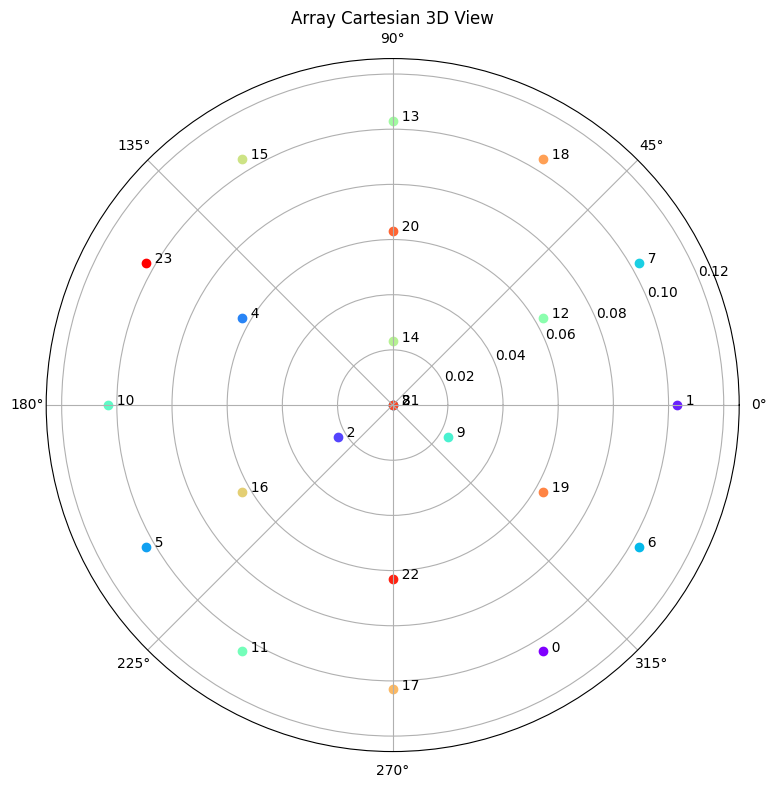

In [765]:
geometry = pd.read_csv('../tools/AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = '../plot/')

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

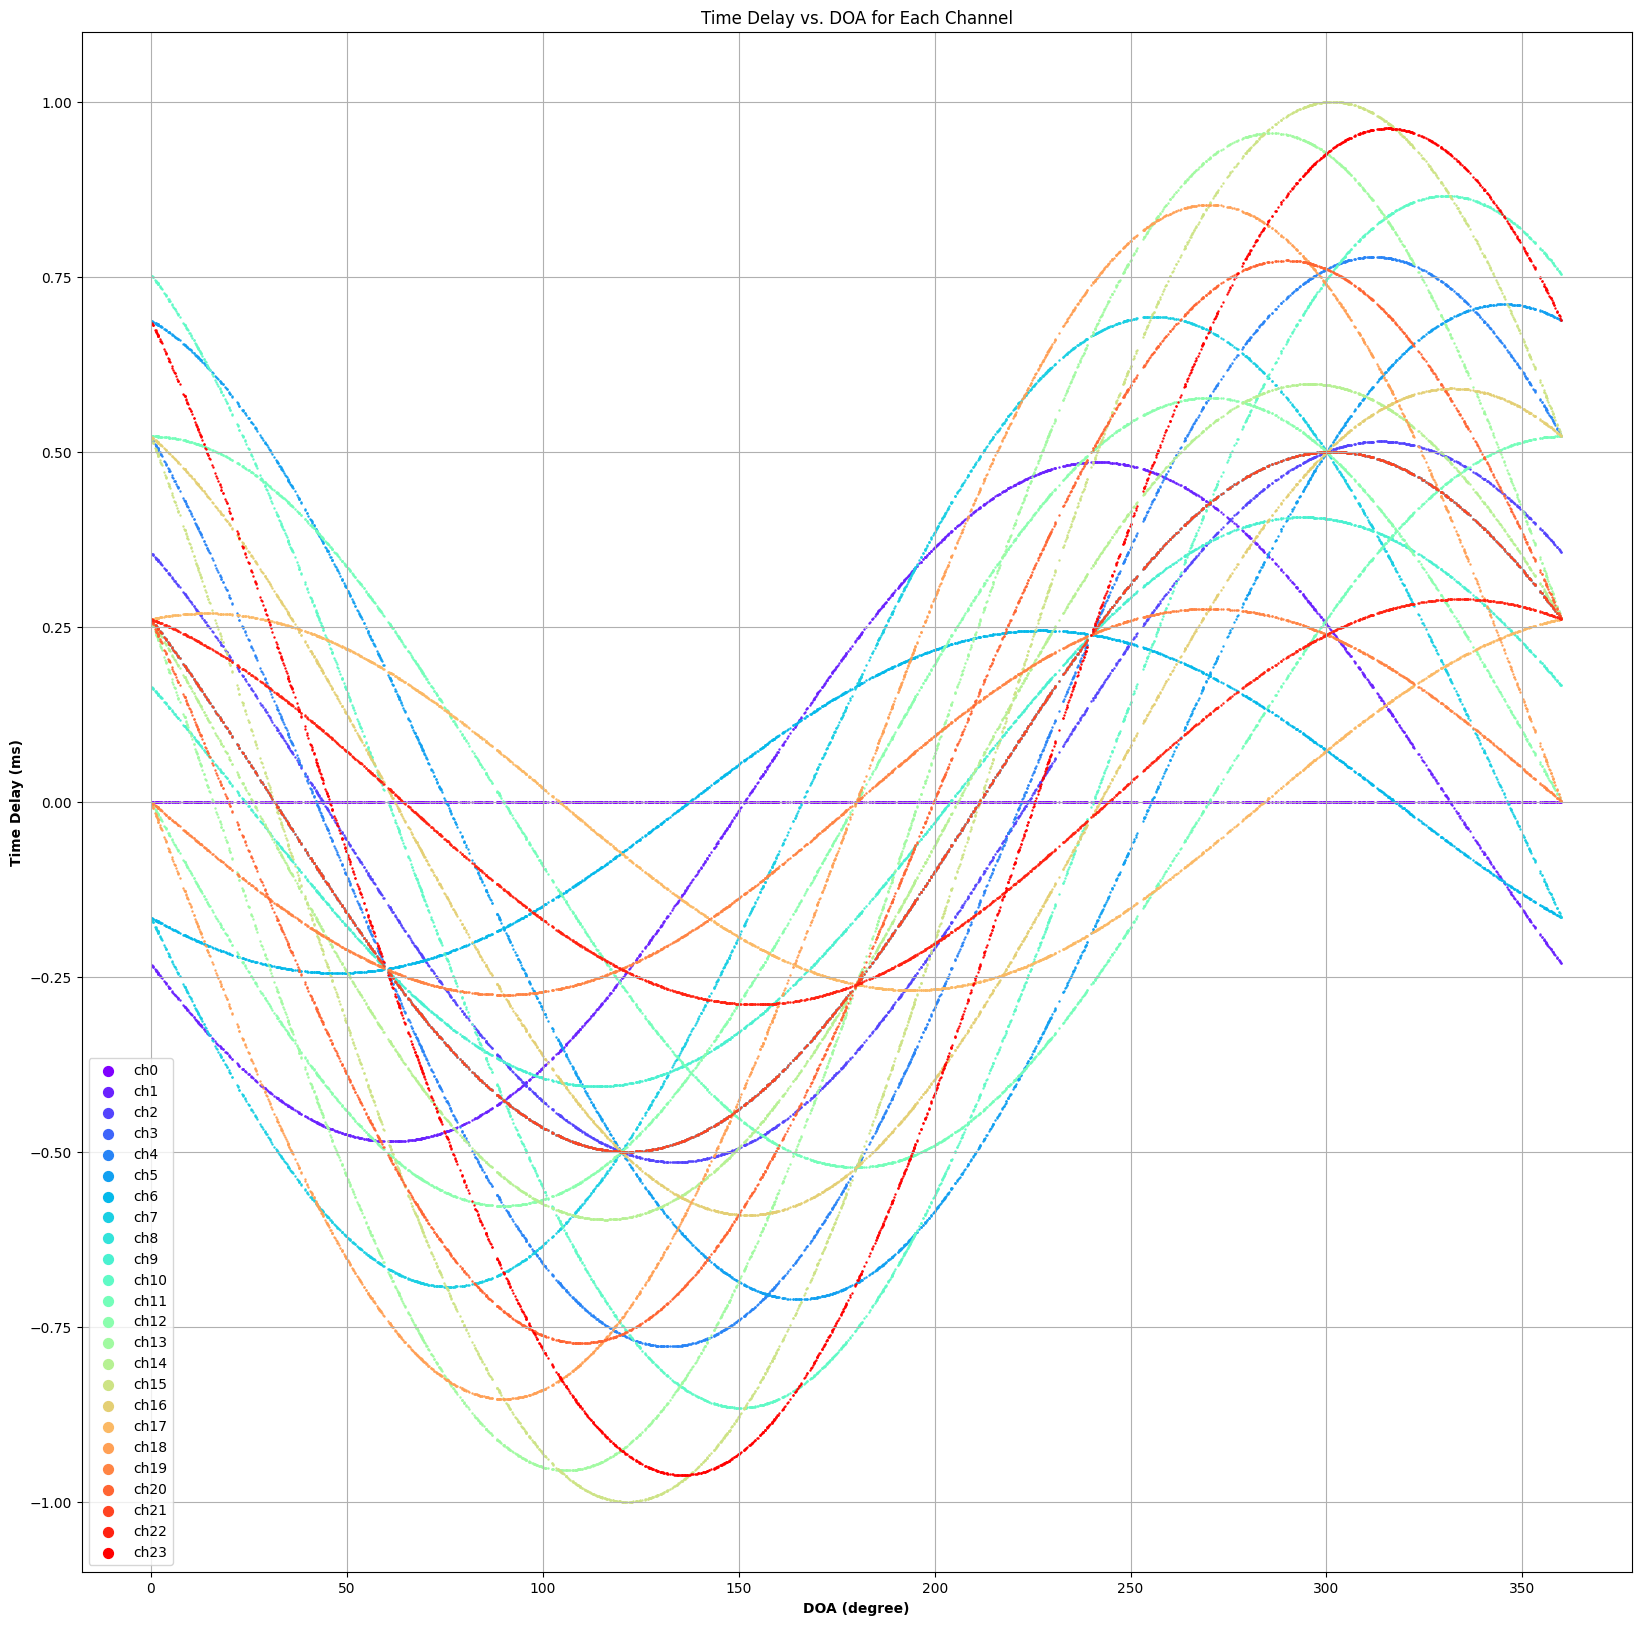

In [766]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
norm = data.get_norm()
#ref_points = data.get_ref()
inputs, speeds, angles = data.get_data()
data.plot()

In [767]:
df_with_he = pd.read_csv("../plot/models_evaluation_with_weights_initialization.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in df_with_he.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]
list_channels

[[1, 14, 21],
 [12, 14, 20],
 [10, 11, 13],
 [8, 17, 22],
 [6, 11, 20],
 [7, 8, 21],
 [0, 12, 22],
 [8, 11, 13],
 [2, 10, 22],
 [7, 15, 22],
 [8, 16, 23],
 [1, 4, 14],
 [1, 5, 12],
 [7, 8, 11],
 [3, 11, 17],
 [6, 12, 13],
 [3, 7, 10],
 [4, 13, 23],
 [10, 13, 22],
 [4, 9, 15],
 [4, 16, 17],
 [3, 10, 13],
 [3, 10, 13],
 [8, 10, 15],
 [6, 16, 22],
 [15, 19, 21],
 [1, 13, 19],
 [5, 18, 21],
 [3, 4, 21],
 [7, 9, 11],
 [8, 15, 17],
 [0, 7, 18],
 [1, 14, 21],
 [17, 20, 22],
 [5, 13, 14],
 [4, 14, 22],
 [0, 15, 23],
 [5, 15, 23],
 [3, 7, 10],
 [0, 2, 12],
 [2, 10, 19],
 [3, 9, 20],
 [6, 15, 21],
 [3, 12, 20],
 [10, 12, 13],
 [0, 7, 17],
 [10, 11, 18],
 [13, 14, 16],
 [5, 12, 22],
 [15, 19, 23],
 [0, 2, 4, 6, 14, 23],
 [2, 4, 5, 6, 10, 16],
 [1, 5, 6, 15, 16, 22],
 [2, 5, 9, 13, 17, 22],
 [2, 10, 12, 14, 20, 23],
 [5, 6, 7, 13, 19, 23],
 [5, 11, 13, 15, 21, 22],
 [3, 8, 14, 15, 16, 17],
 [10, 14, 16, 17, 20, 21],
 [0, 1, 2, 13, 14, 15],
 [0, 2, 5, 7, 9, 18],
 [2, 3, 9, 10, 11, 15],
 [4, 8, 9, 1

In [768]:
# Get the list of channels with loss less than 55 
# The 75 is a convience number from the results
top_with_he =  df_with_he.index[df_with_he['Loss'] < 55].tolist()
top_list_channels = [list_channels[i] for i in top_with_he]
top_list_channels.append(list(range(0,24)))
top_list_channels

[[6, 12, 13],
 [1, 13, 19],
 [0, 7, 18],
 [3, 12, 20],
 [12, 13, 15, 17, 19, 22],
 [2, 9, 10, 12, 17, 18],
 [2, 7, 9, 13, 19, 20],
 [8, 12, 16, 18, 21, 22],
 [2, 6, 8, 9, 12, 15, 18, 20, 22],
 [0, 2, 4, 8, 9, 12, 18, 19, 22],
 [1, 2, 3, 4, 9, 13, 17, 18, 22],
 [0, 3, 5, 6, 9, 12, 14, 15, 18, 19, 20, 23],
 [2, 3, 4, 6, 8, 10, 12, 13, 14, 15, 17, 18, 19, 22, 23],
 [0, 1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23]]

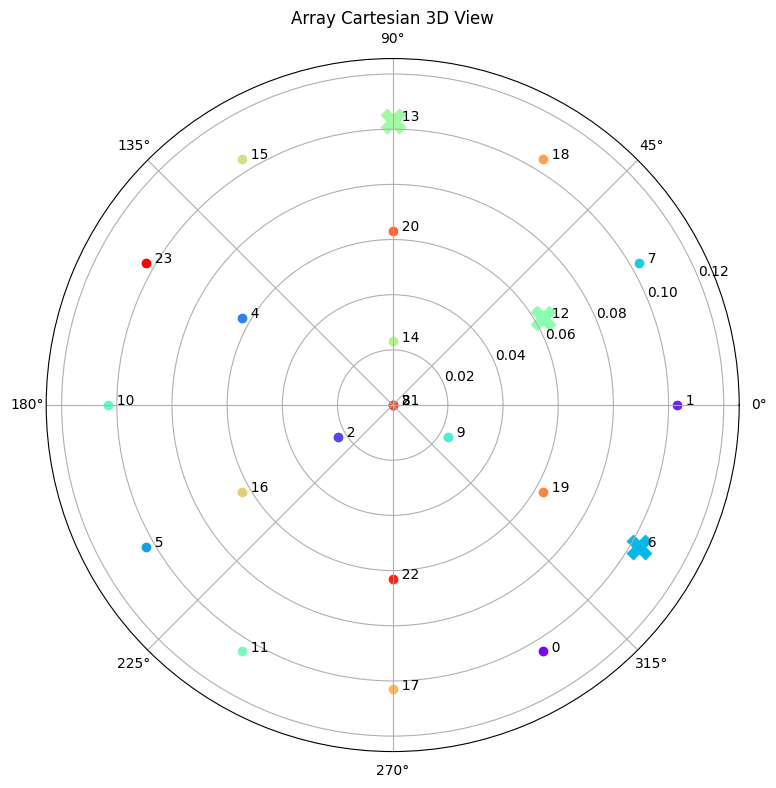

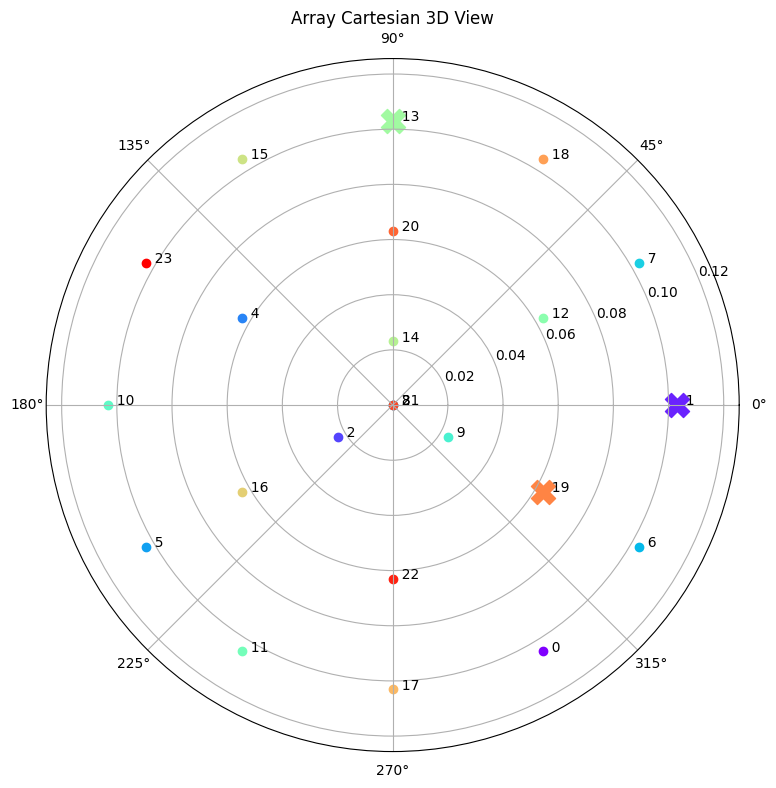

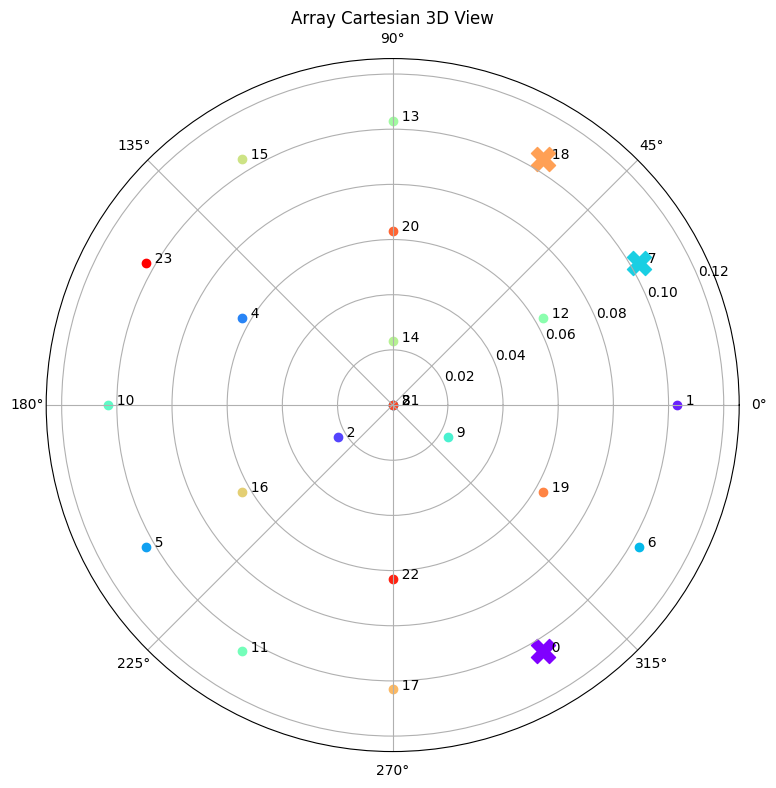

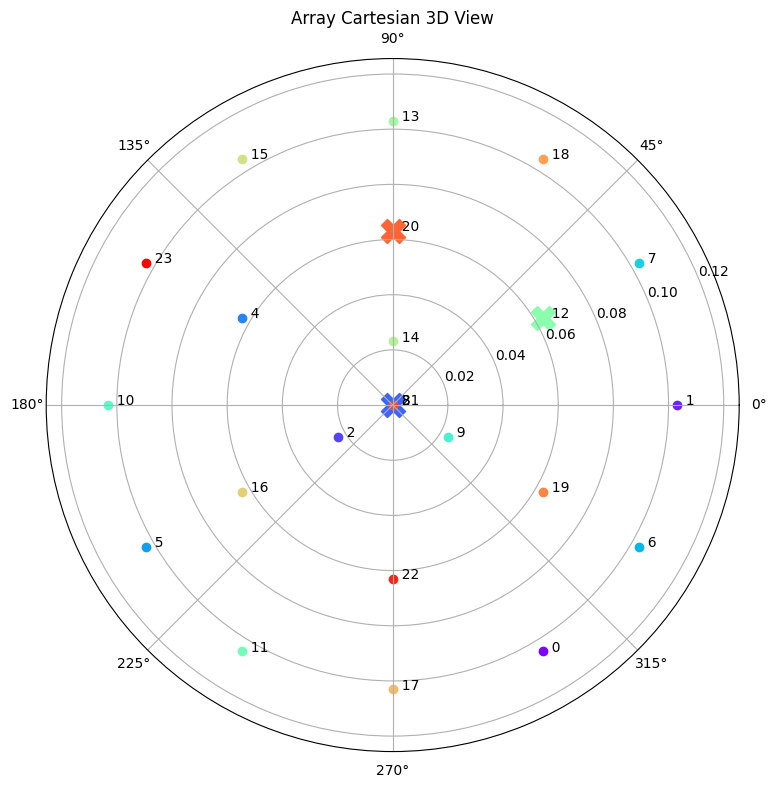

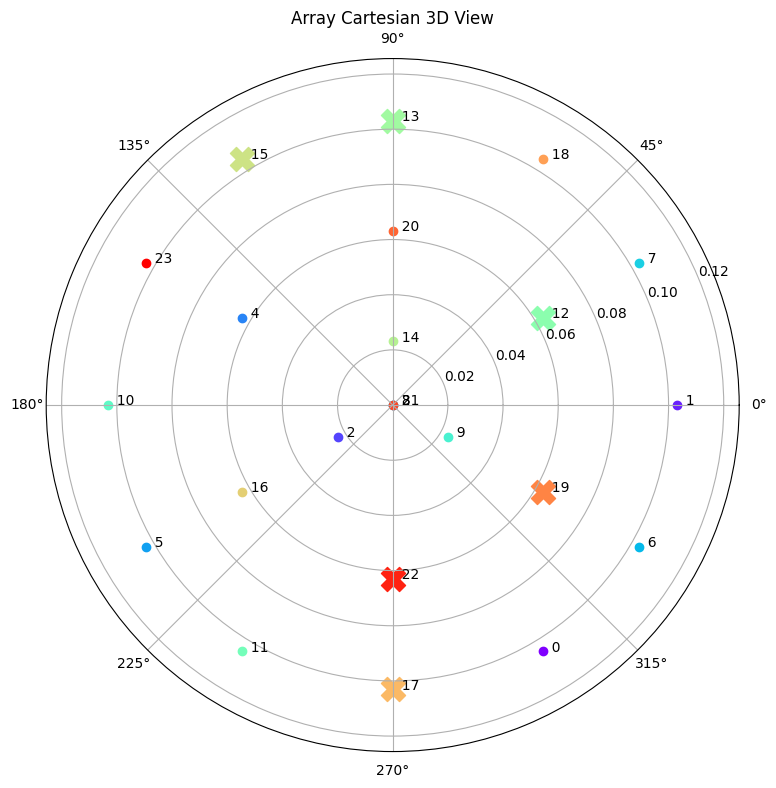

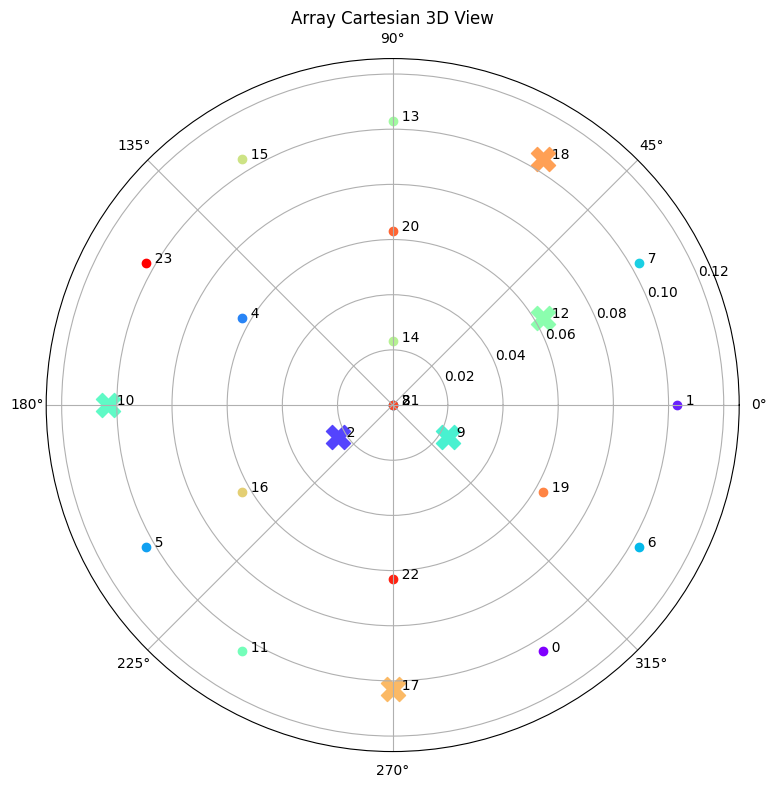

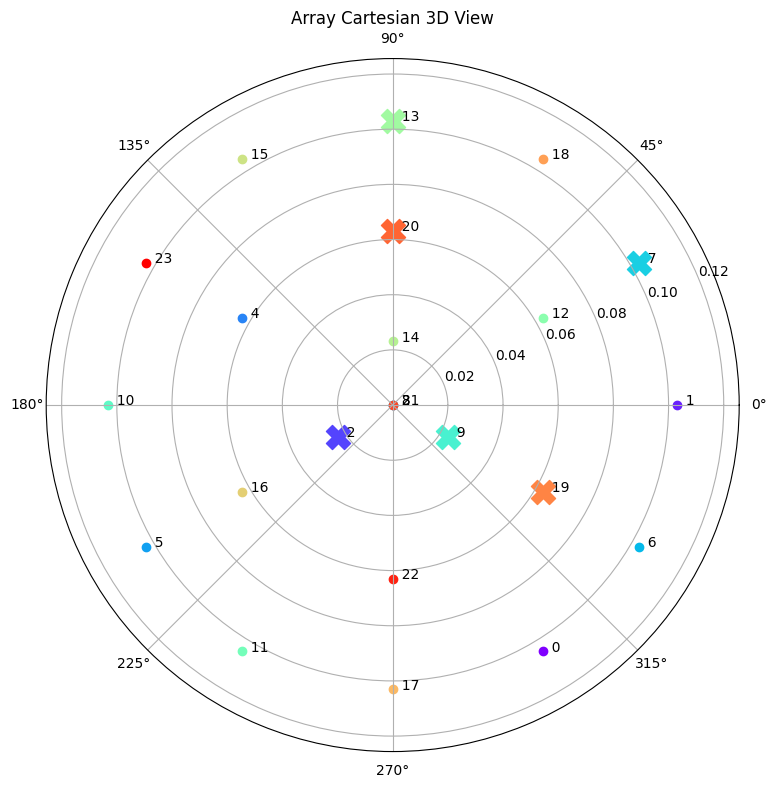

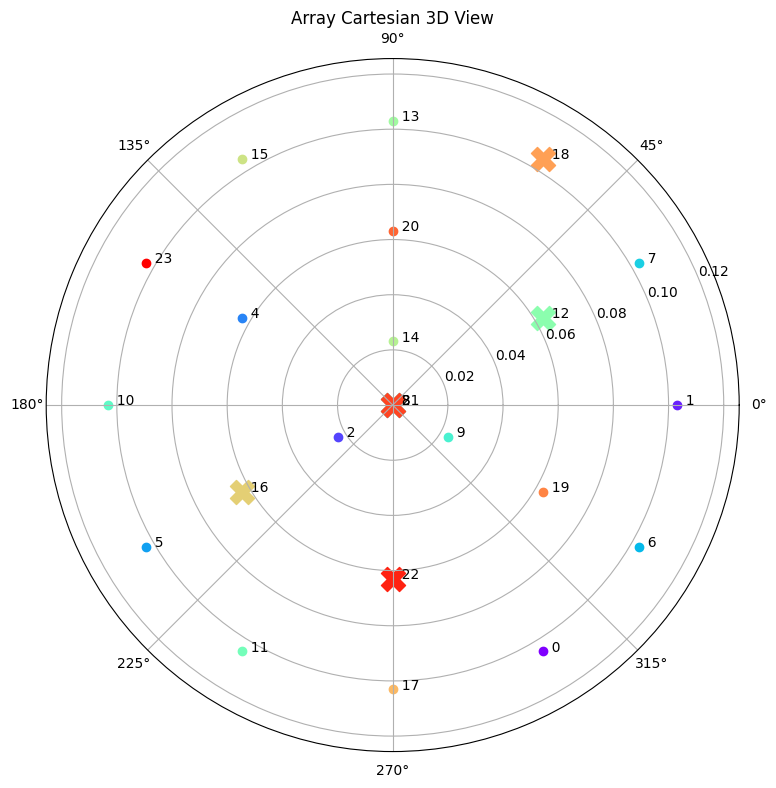

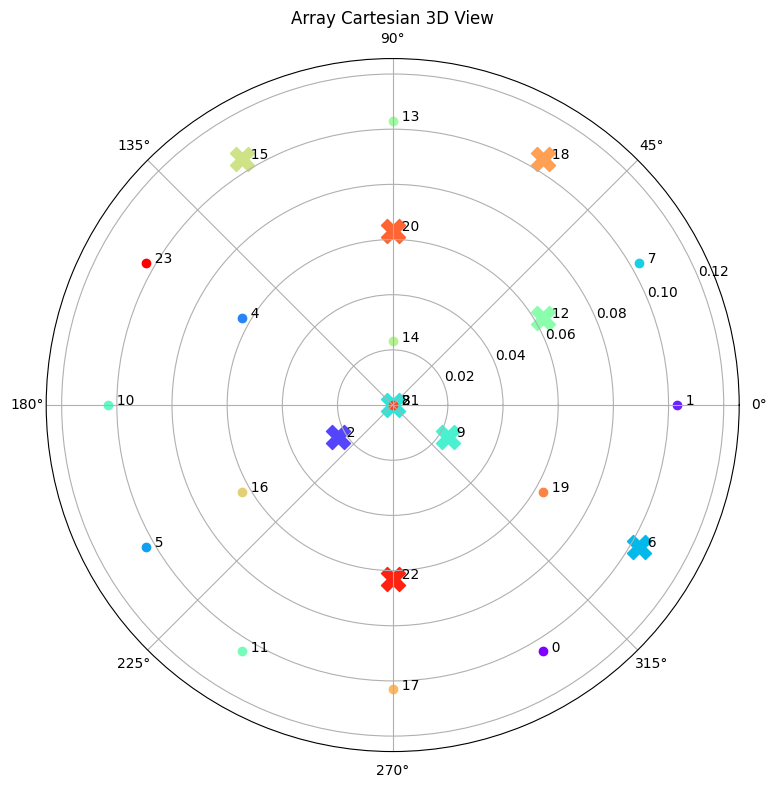

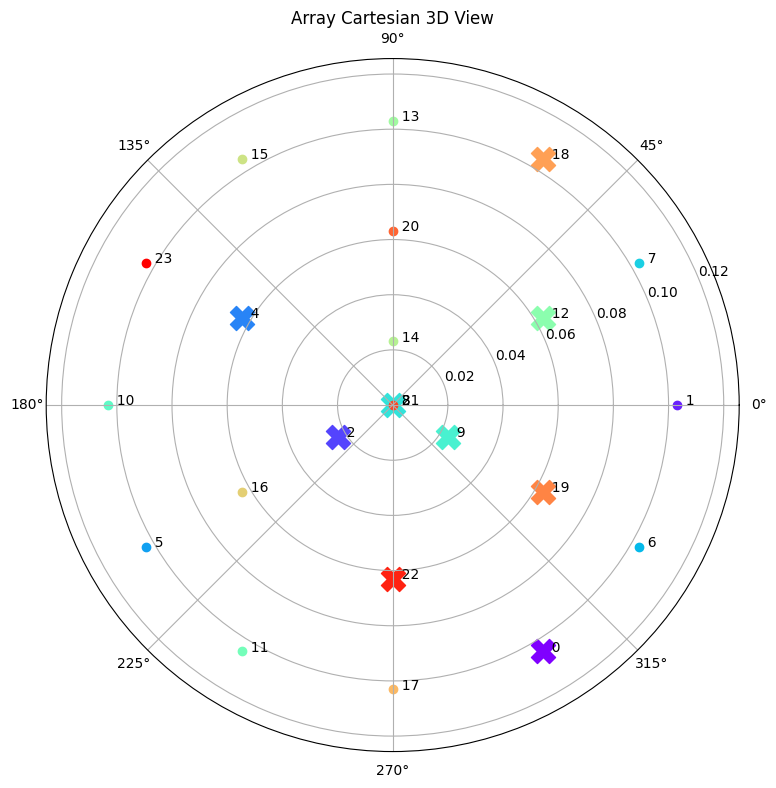

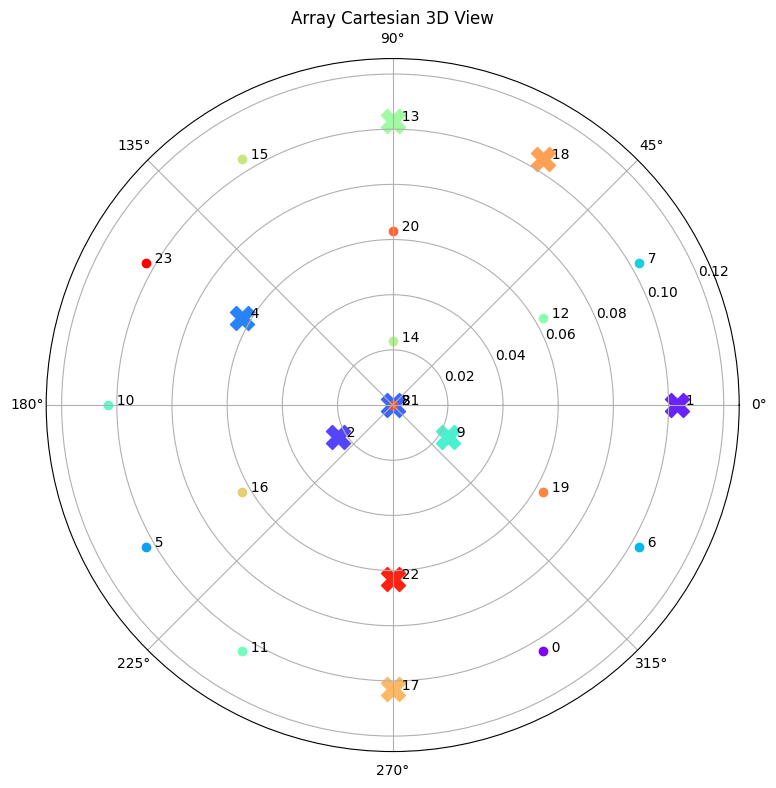

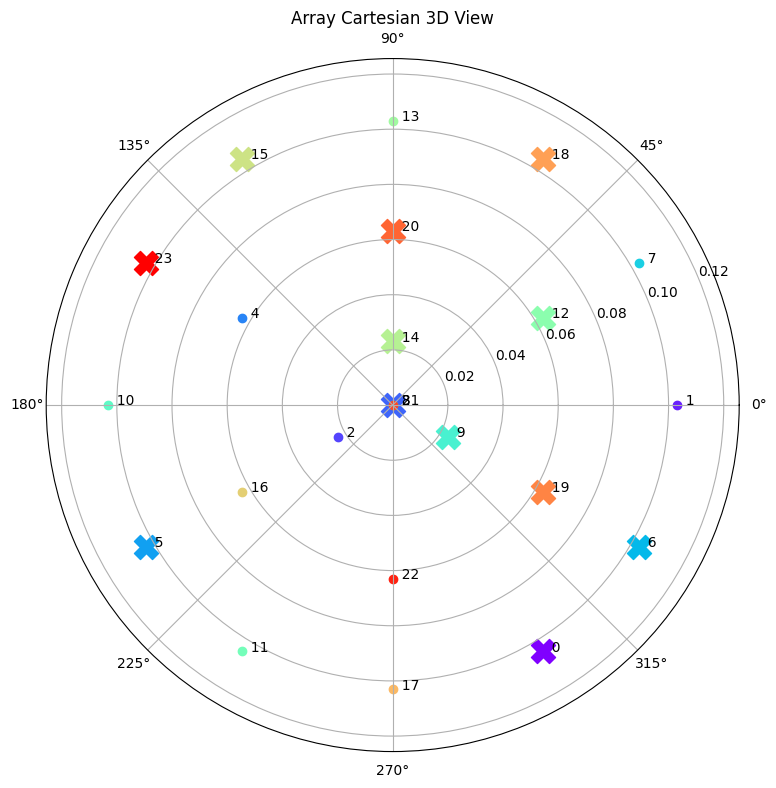

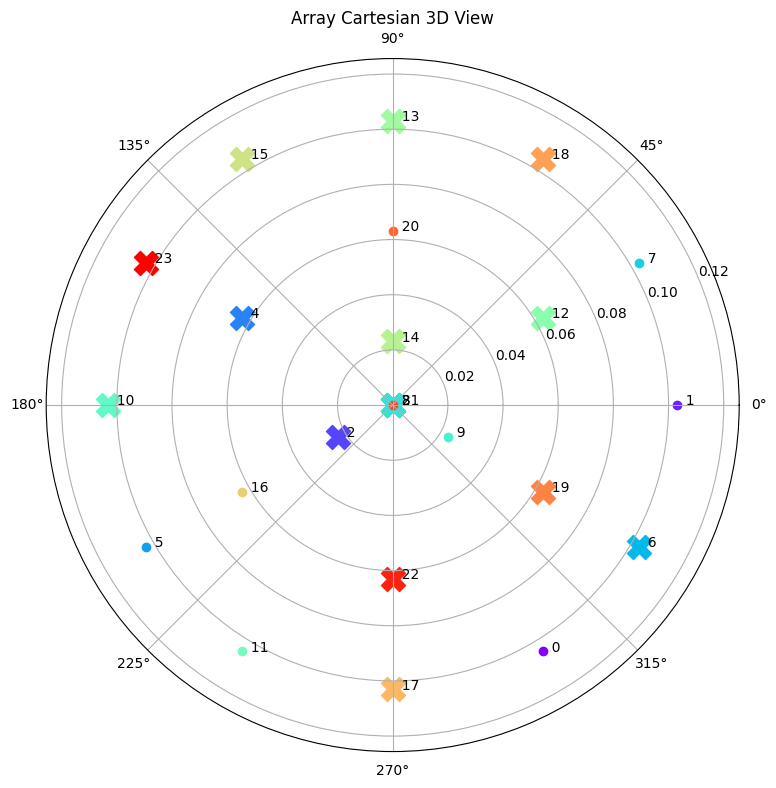

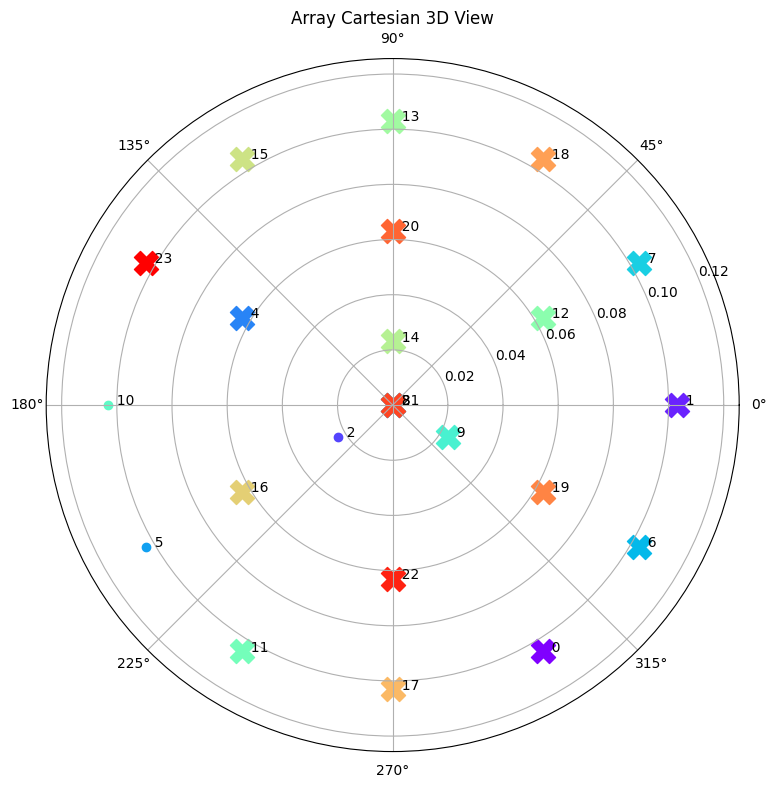

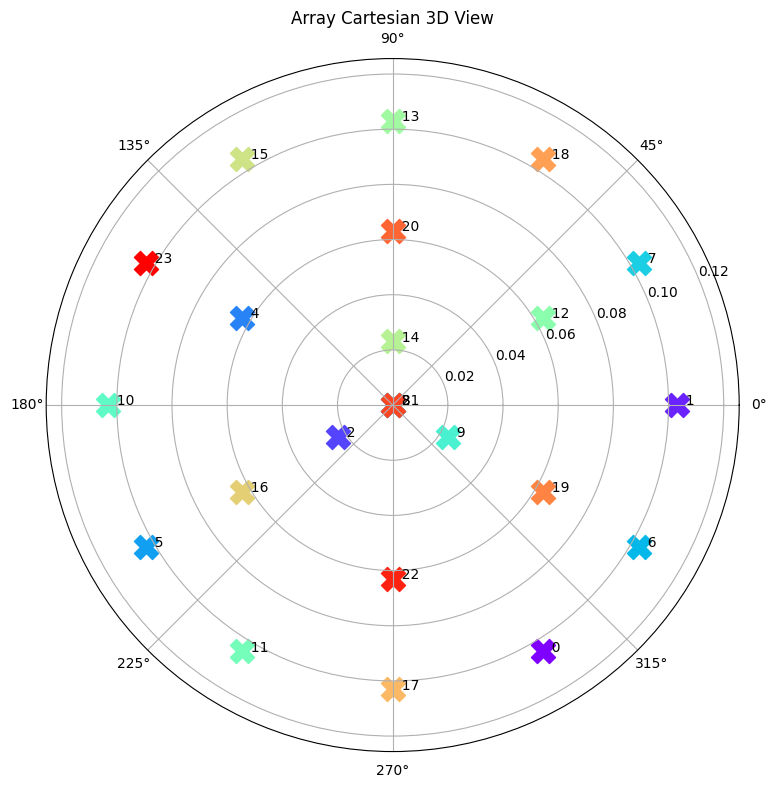

In [769]:
for channels in top_list_channels:
    visualizer.polar(fig_size=(10,9), channels = channels)

[0.03933483734726906, 2622.56884765625, 9.468456268310547]
[0.04670580103993416, 10761.23046875, 33.85536575317383]
[2.0279107093811035, 44027.25390625, 182.8903350830078]
[0.018636666238307953, 3528.16748046875, 12.587488174438477]
[2.4796359539031982, 44027.25390625, 182.8903350830078]
[0.01271000038832426, 2719.405029296875, 9.310894966125488]
[2.3320462703704834, 44027.25390625, 182.8903350830078]
[0.0026987965684384108, 2987.40625, 9.877121925354004]
[0.008420106954872608, 3331.084716796875, 11.919025421142578]
[0.006731711328029633, 3835.234130859375, 12.465442657470703]
[0.03421315550804138, 15119.6796875, 46.1757926940918]


/tmp/ipykernel_3770930/3010386276.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt .subplots(ncols = 3, nrows=1, figsize=(12,3), layout="constrained")


[0.02907312475144863, 8489.94140625, 27.055437088012695]
[0.02617713063955307, 2673.5009765625, 10.979899406433105]
[0.032089803367853165, 5957.1884765625, 19.594215393066406]
[0.14945796132087708, 24357.943359375, 75.40144348144531]


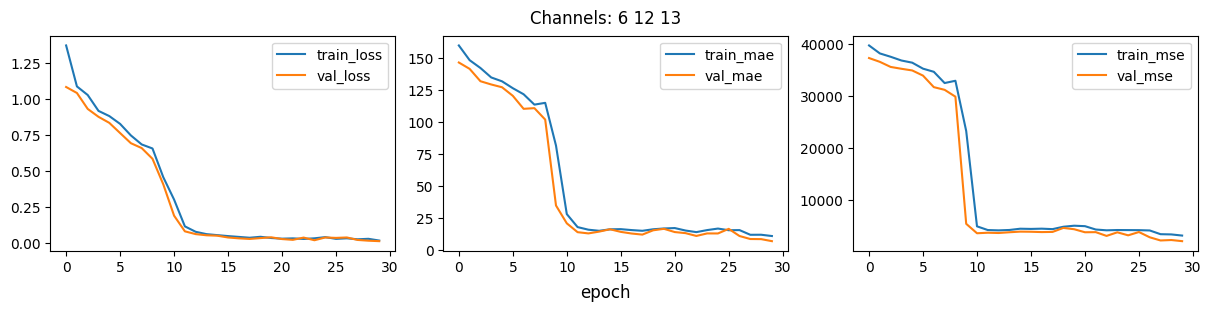

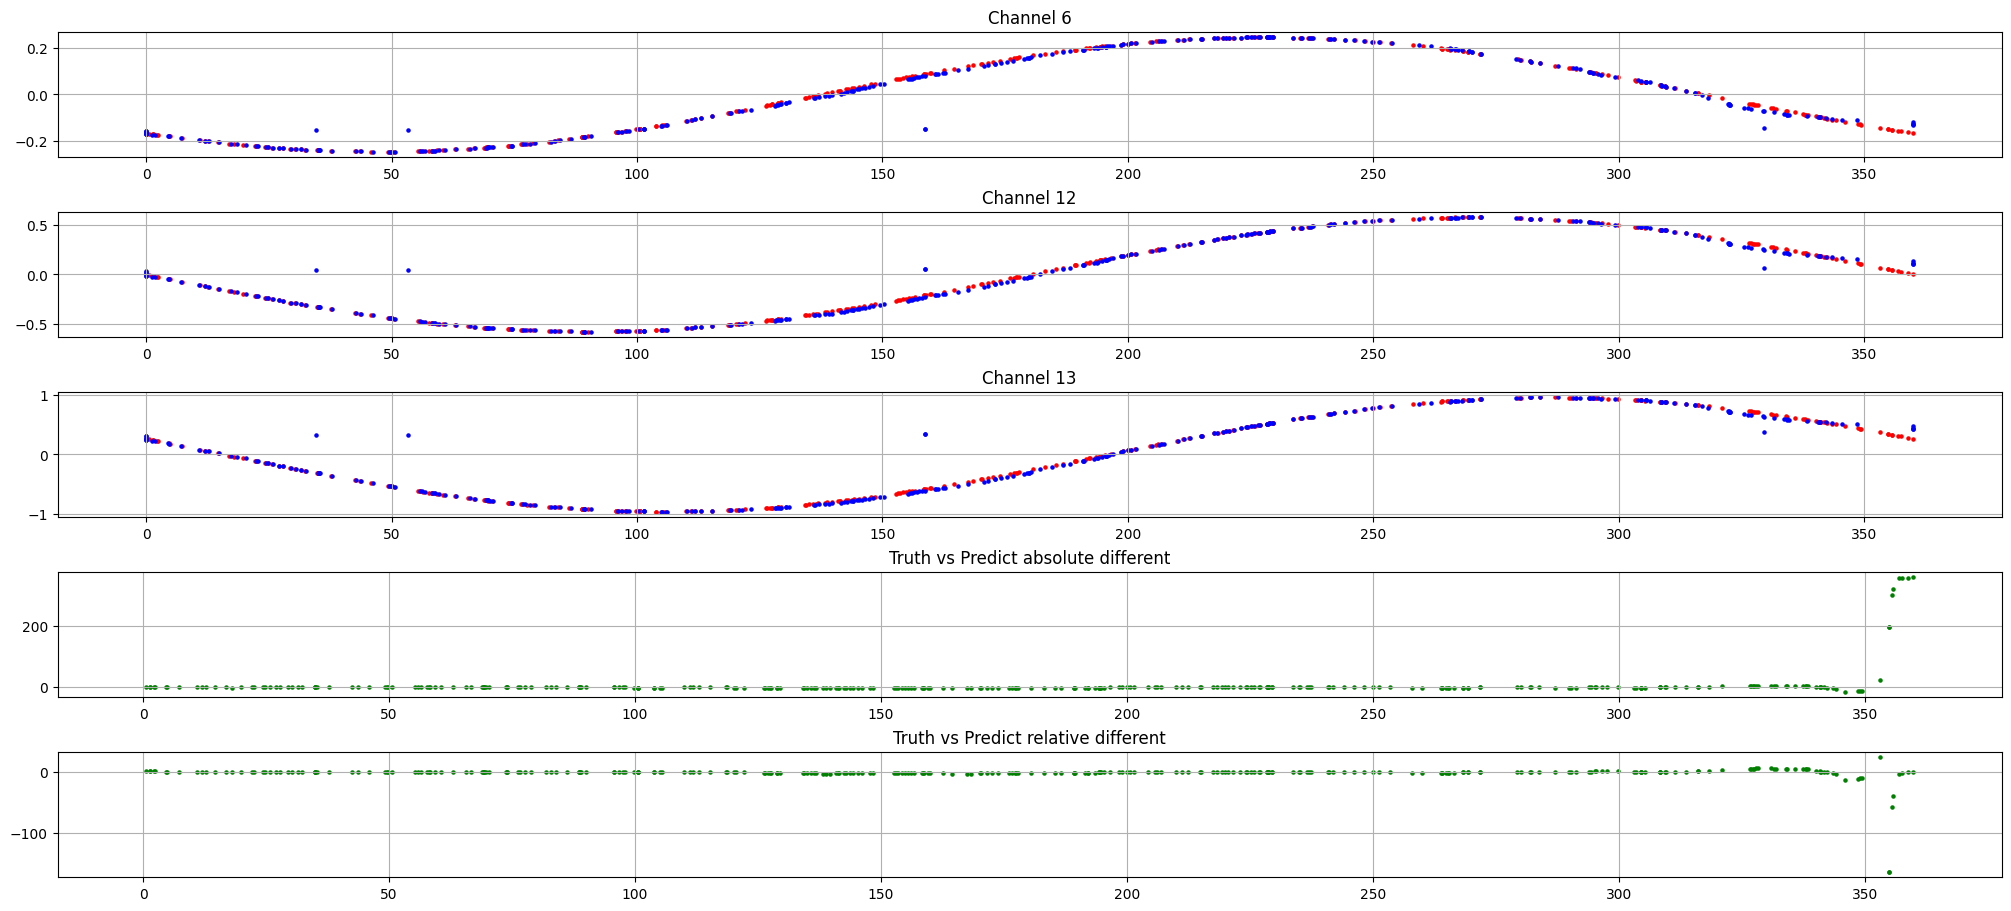

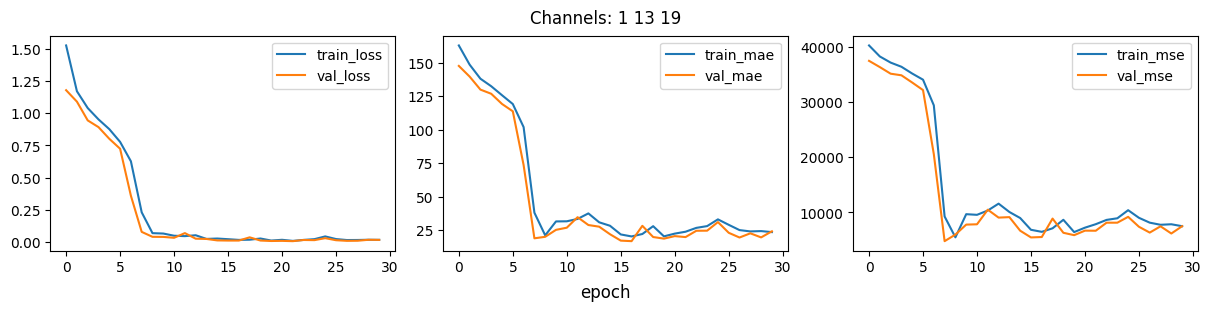

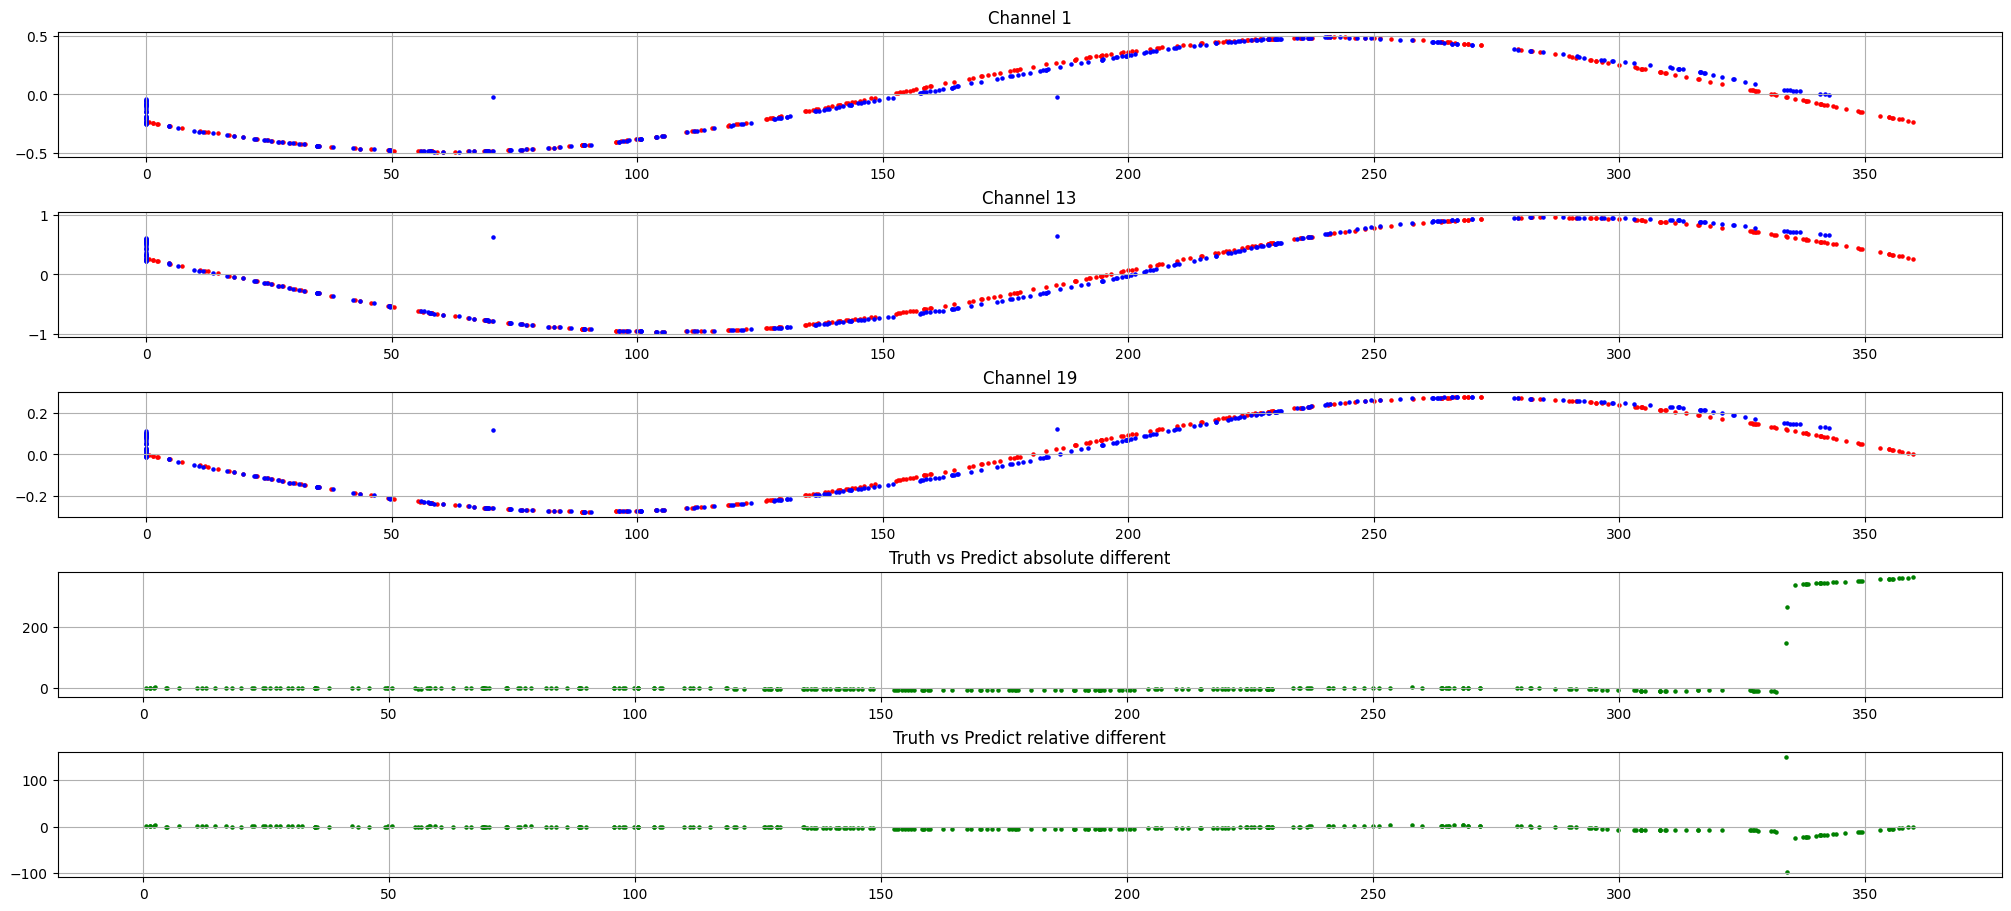

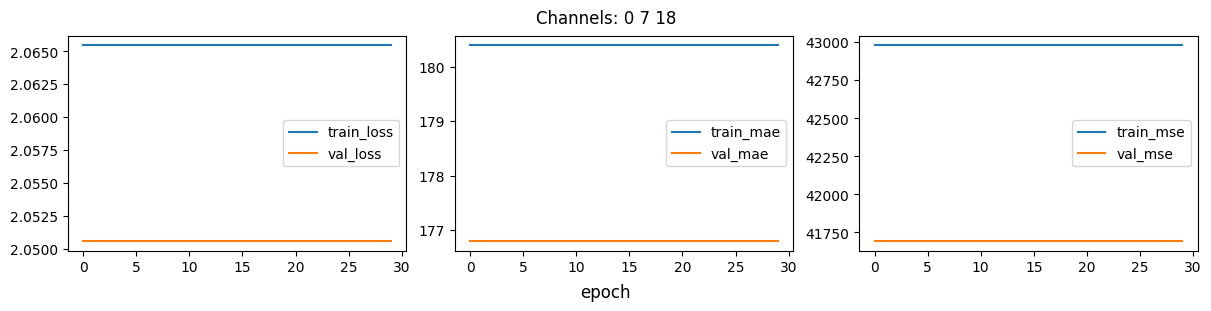

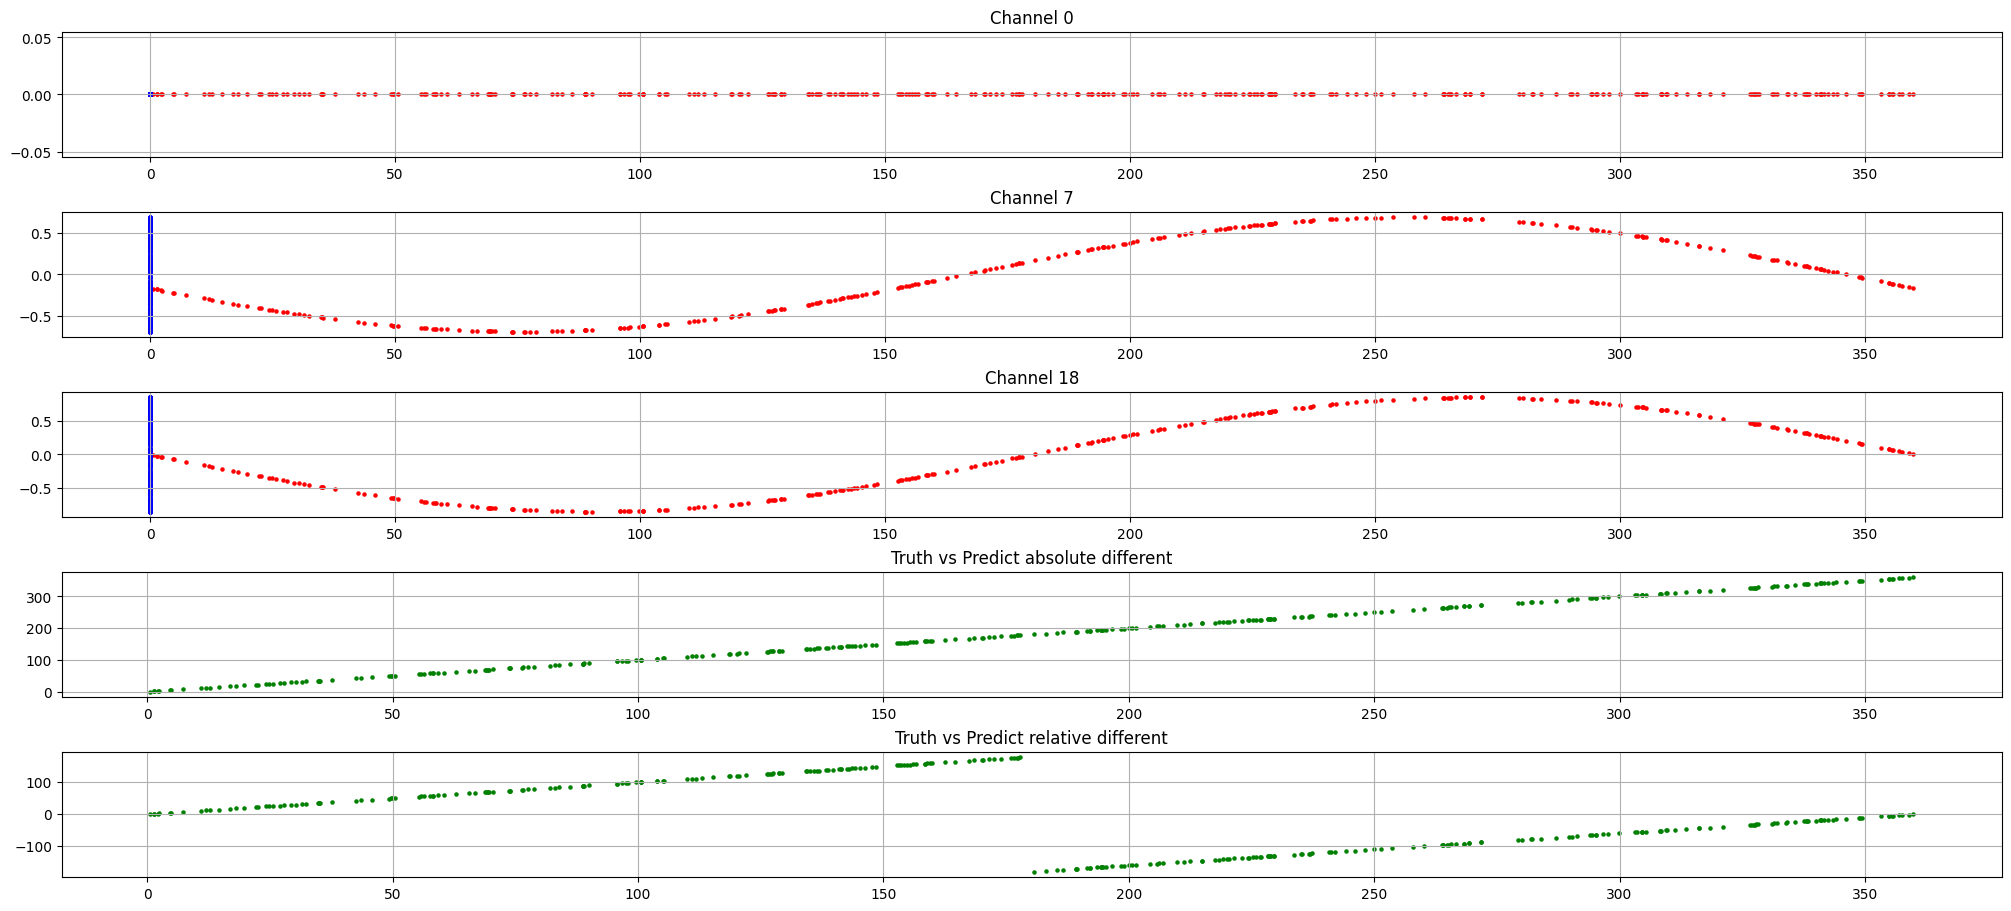

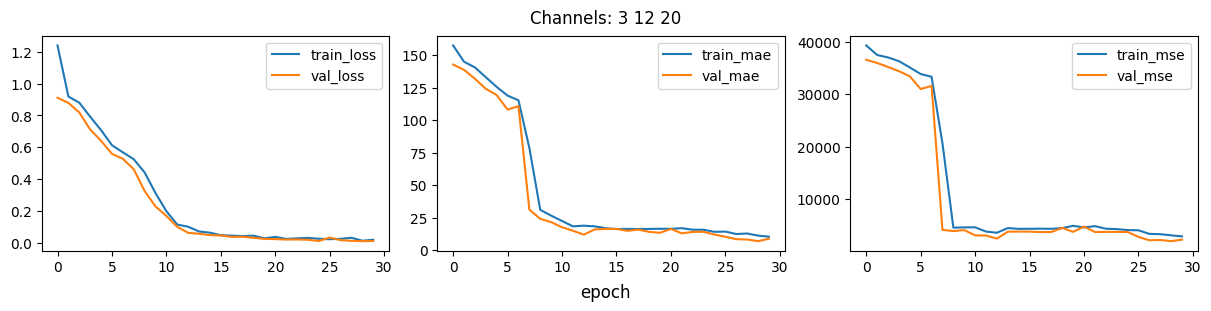

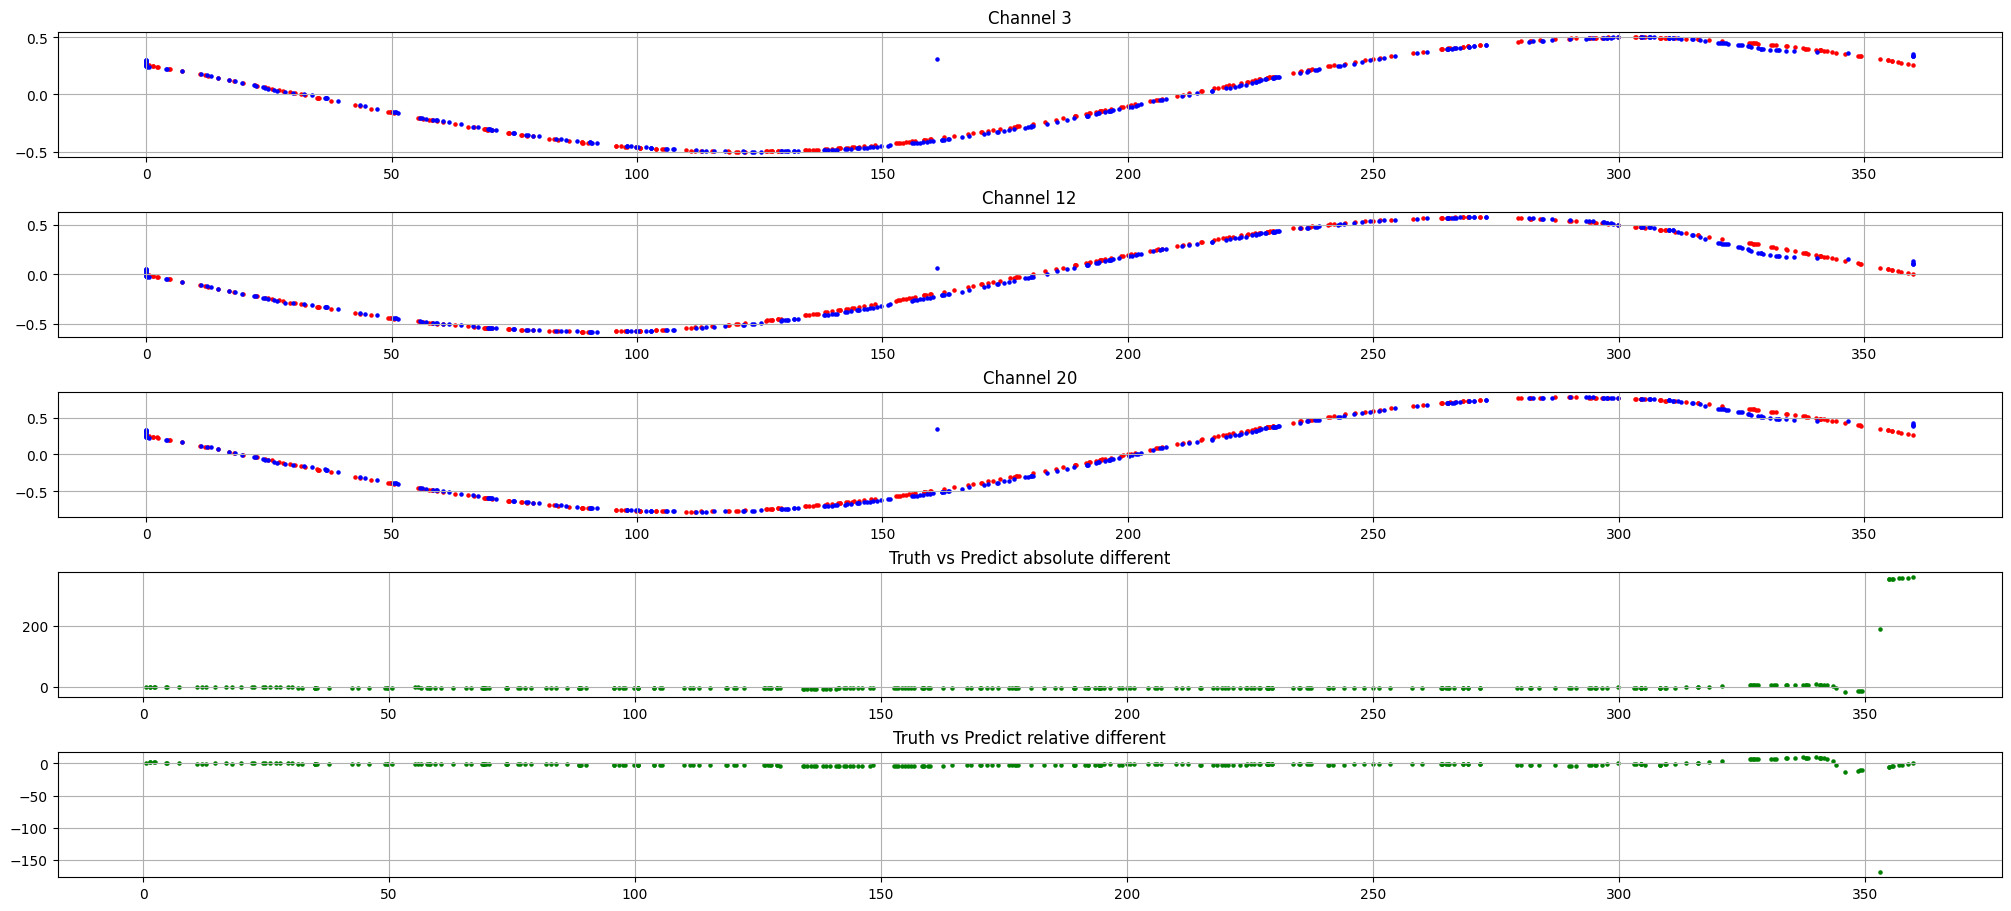

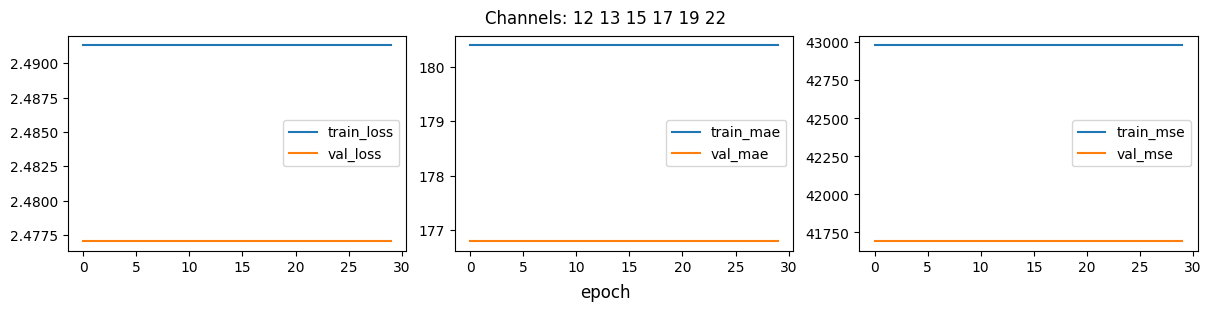

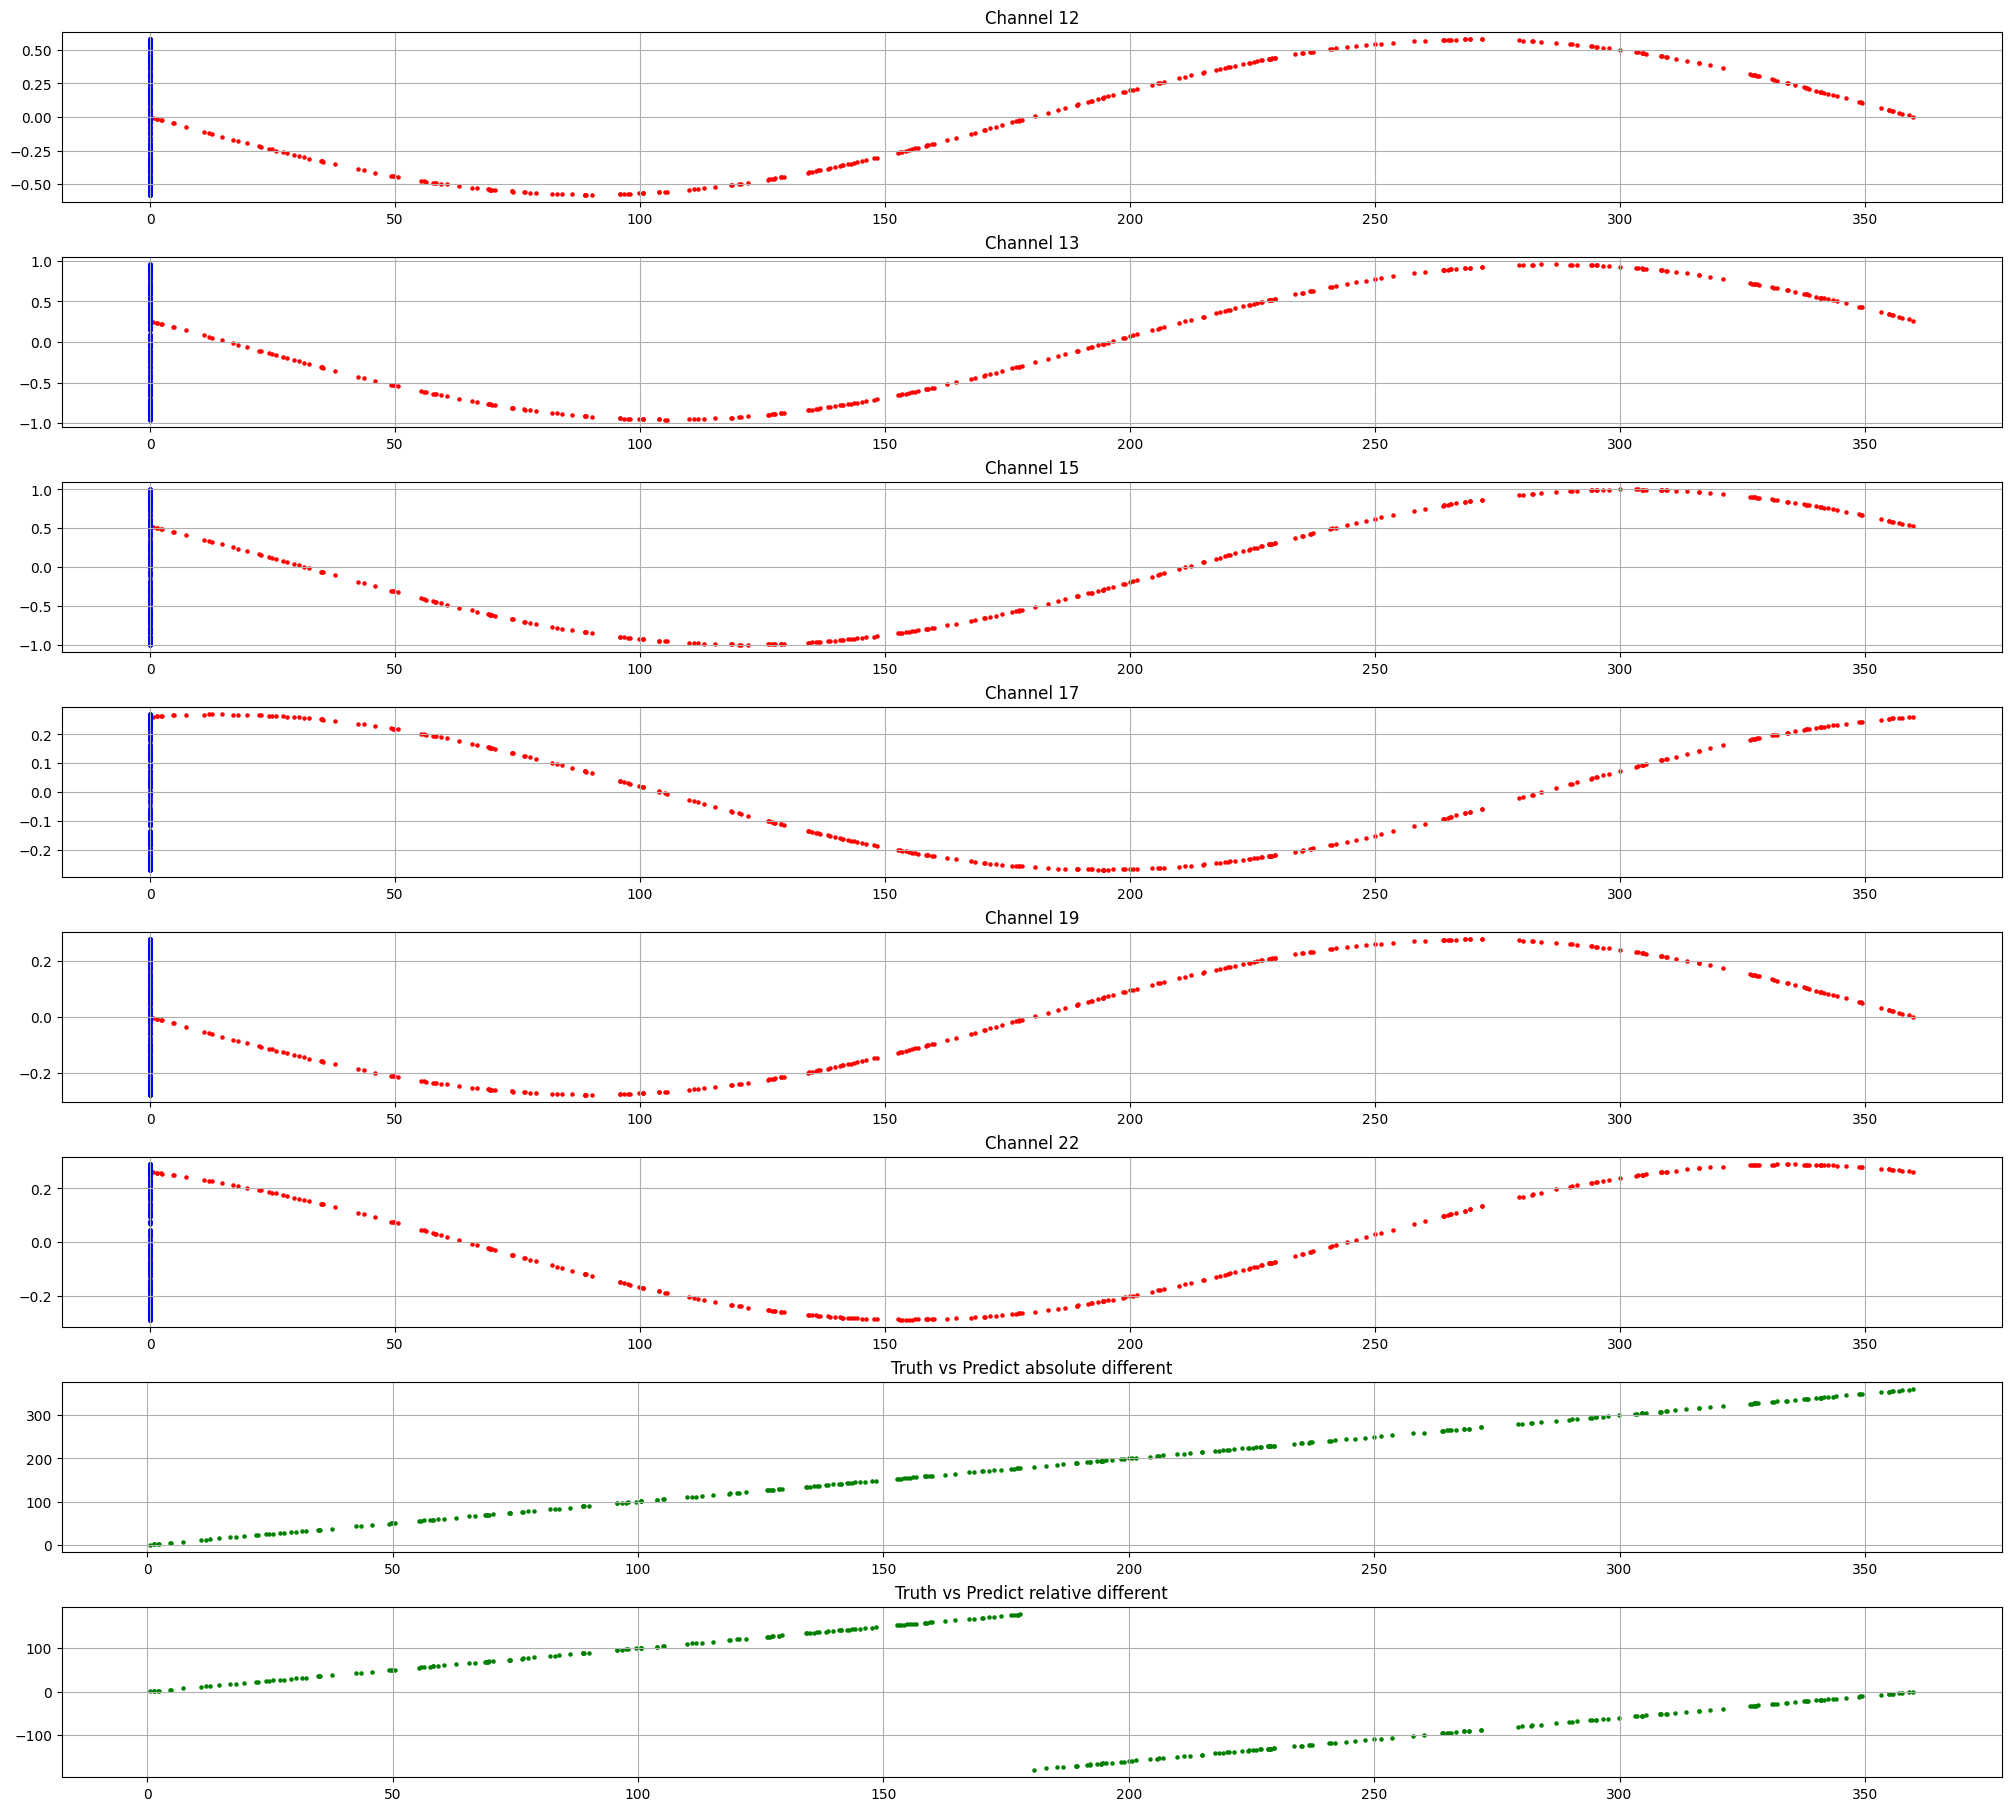

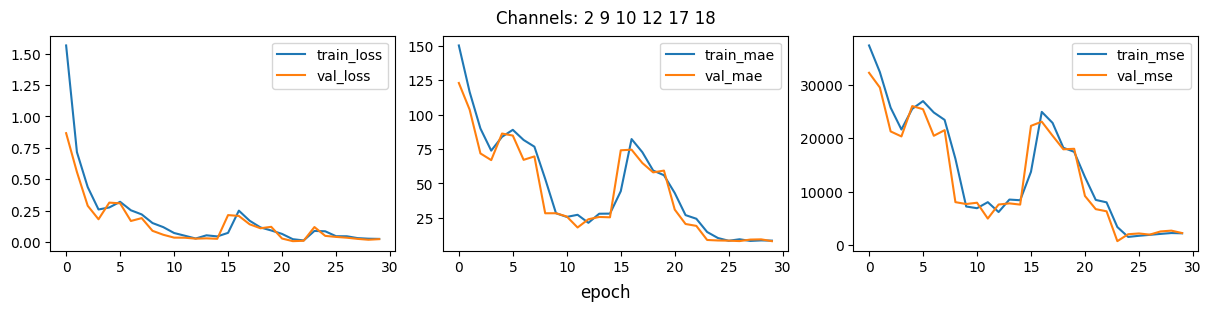

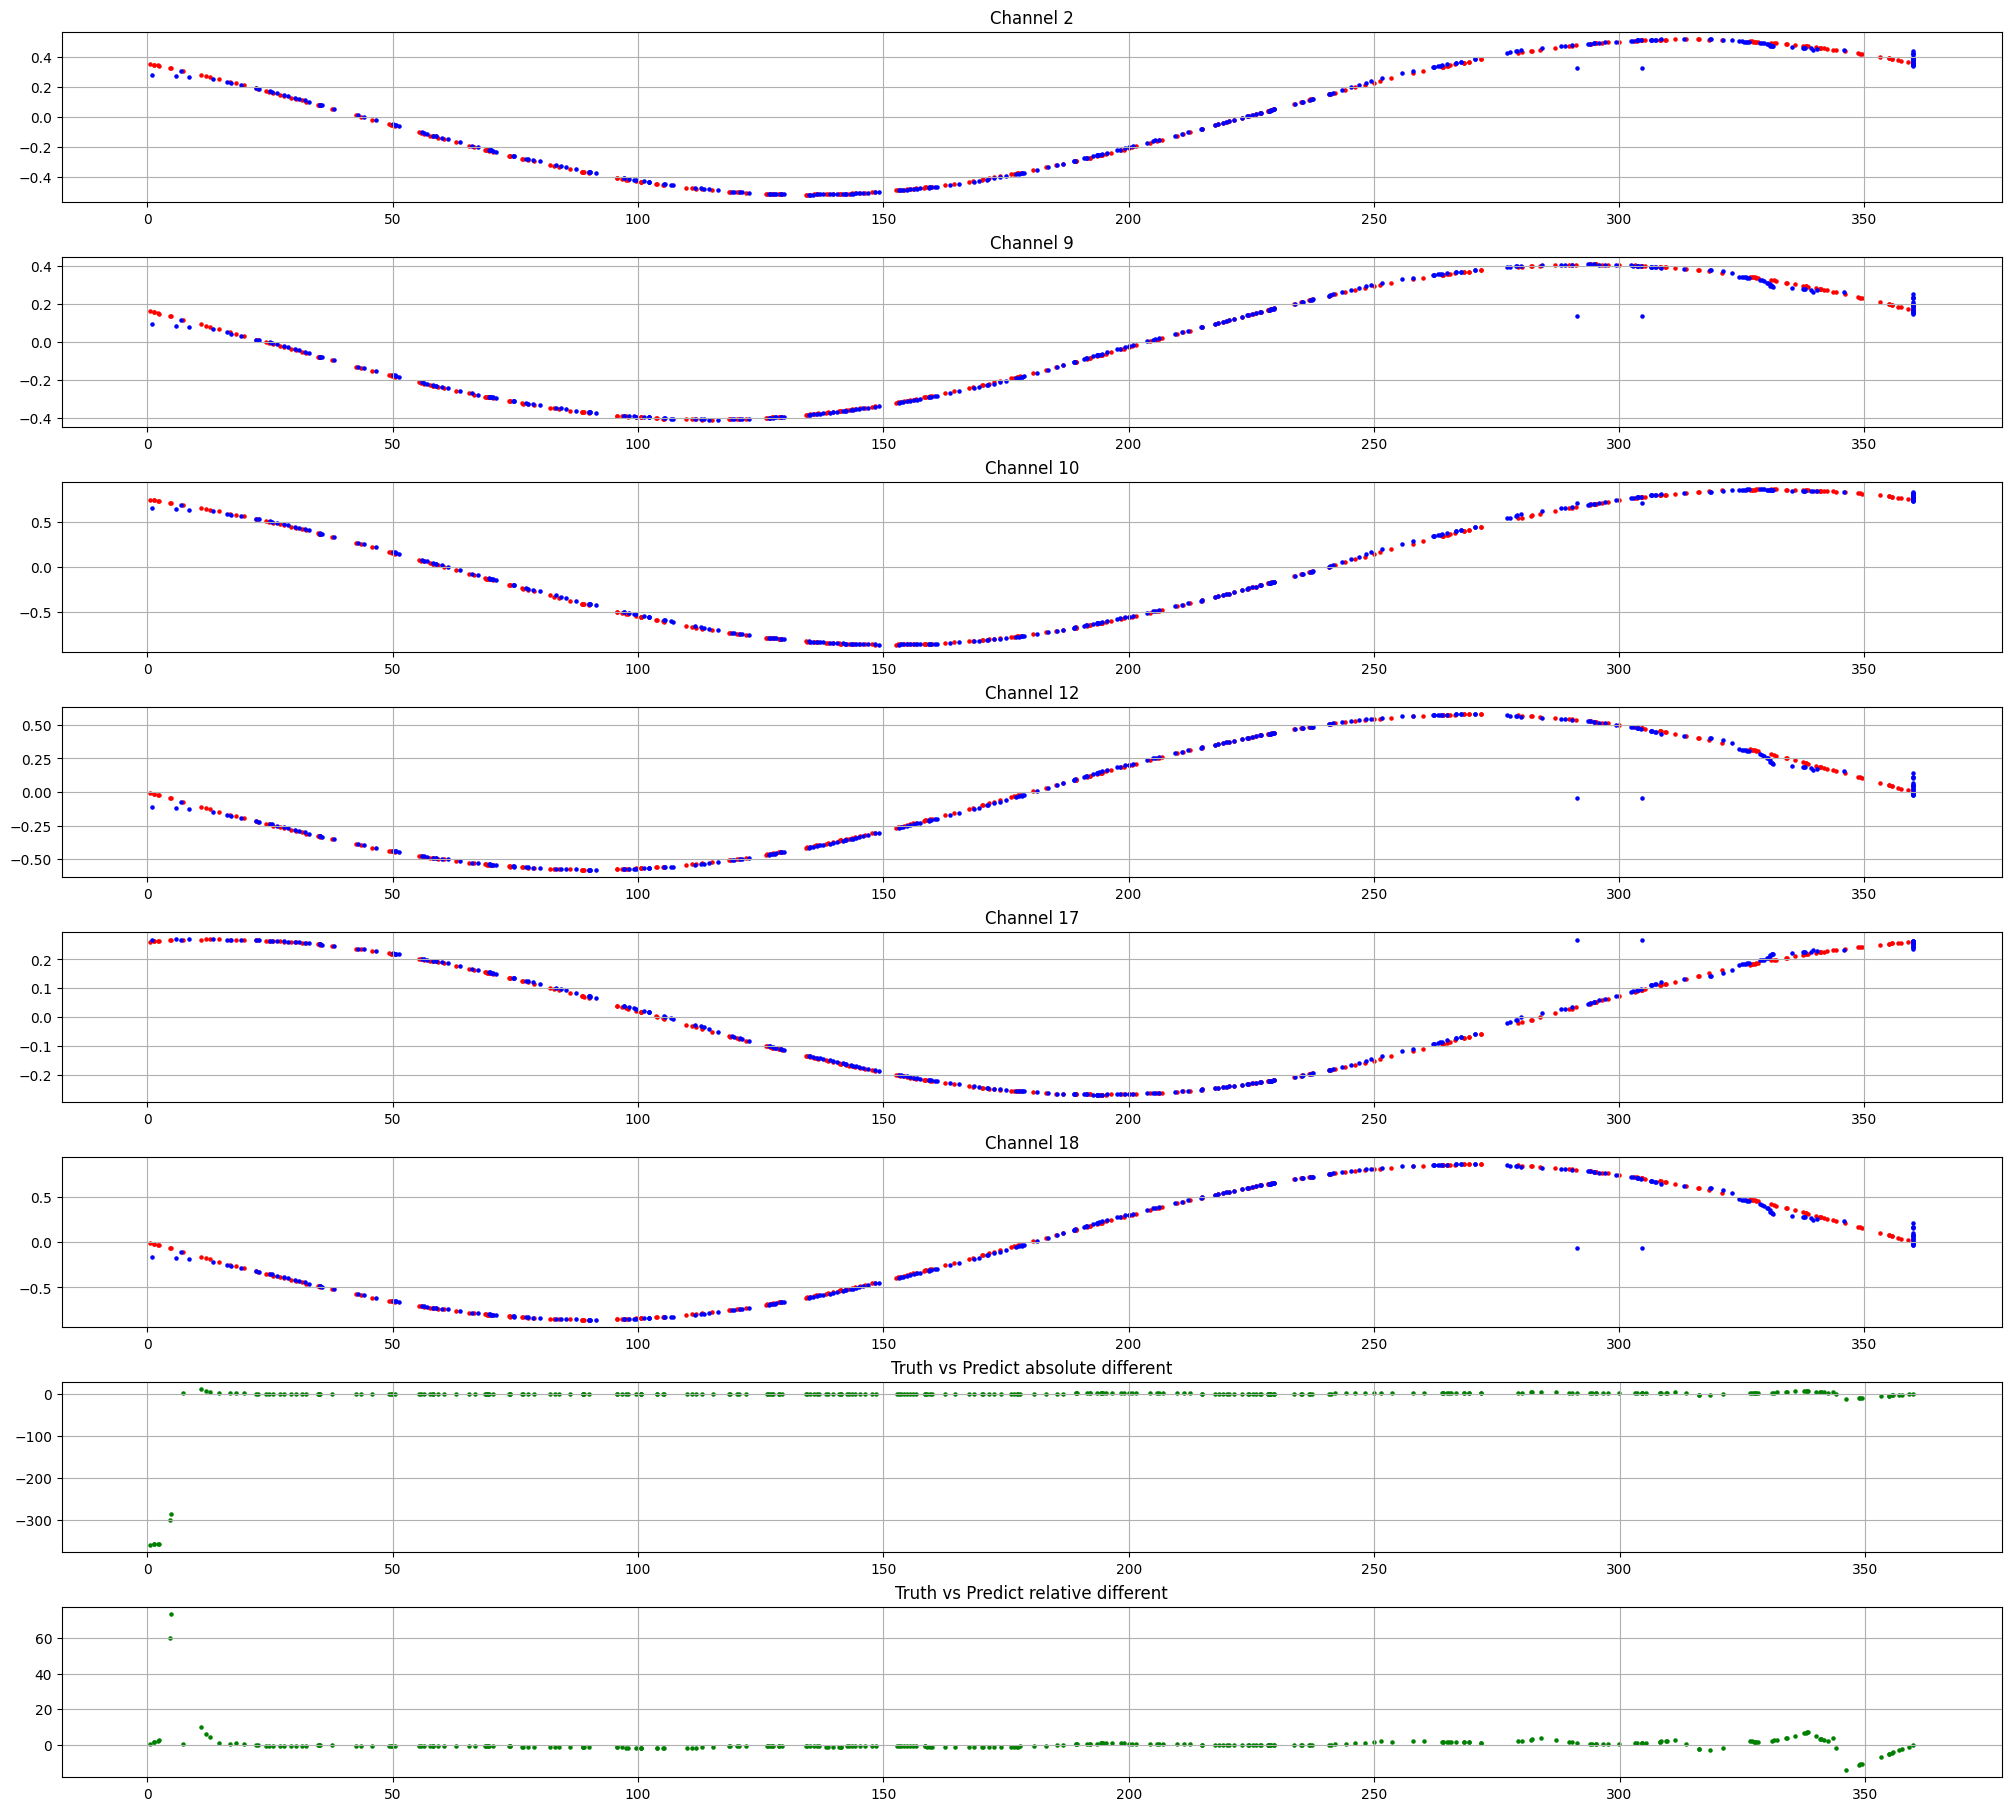

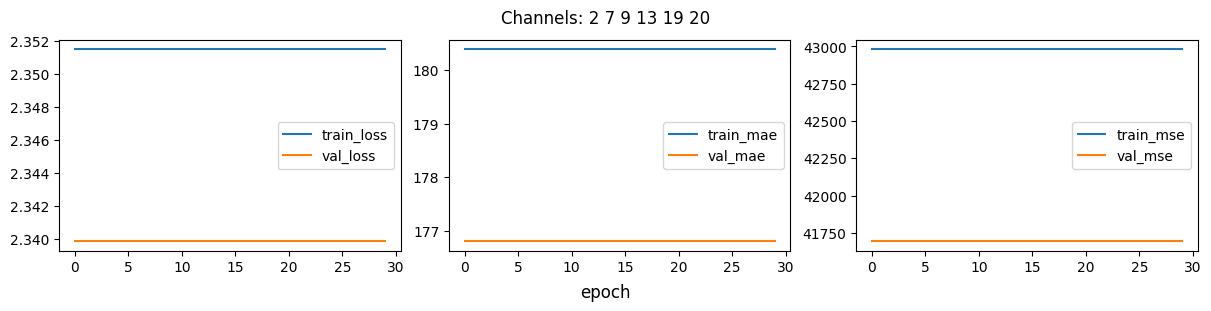

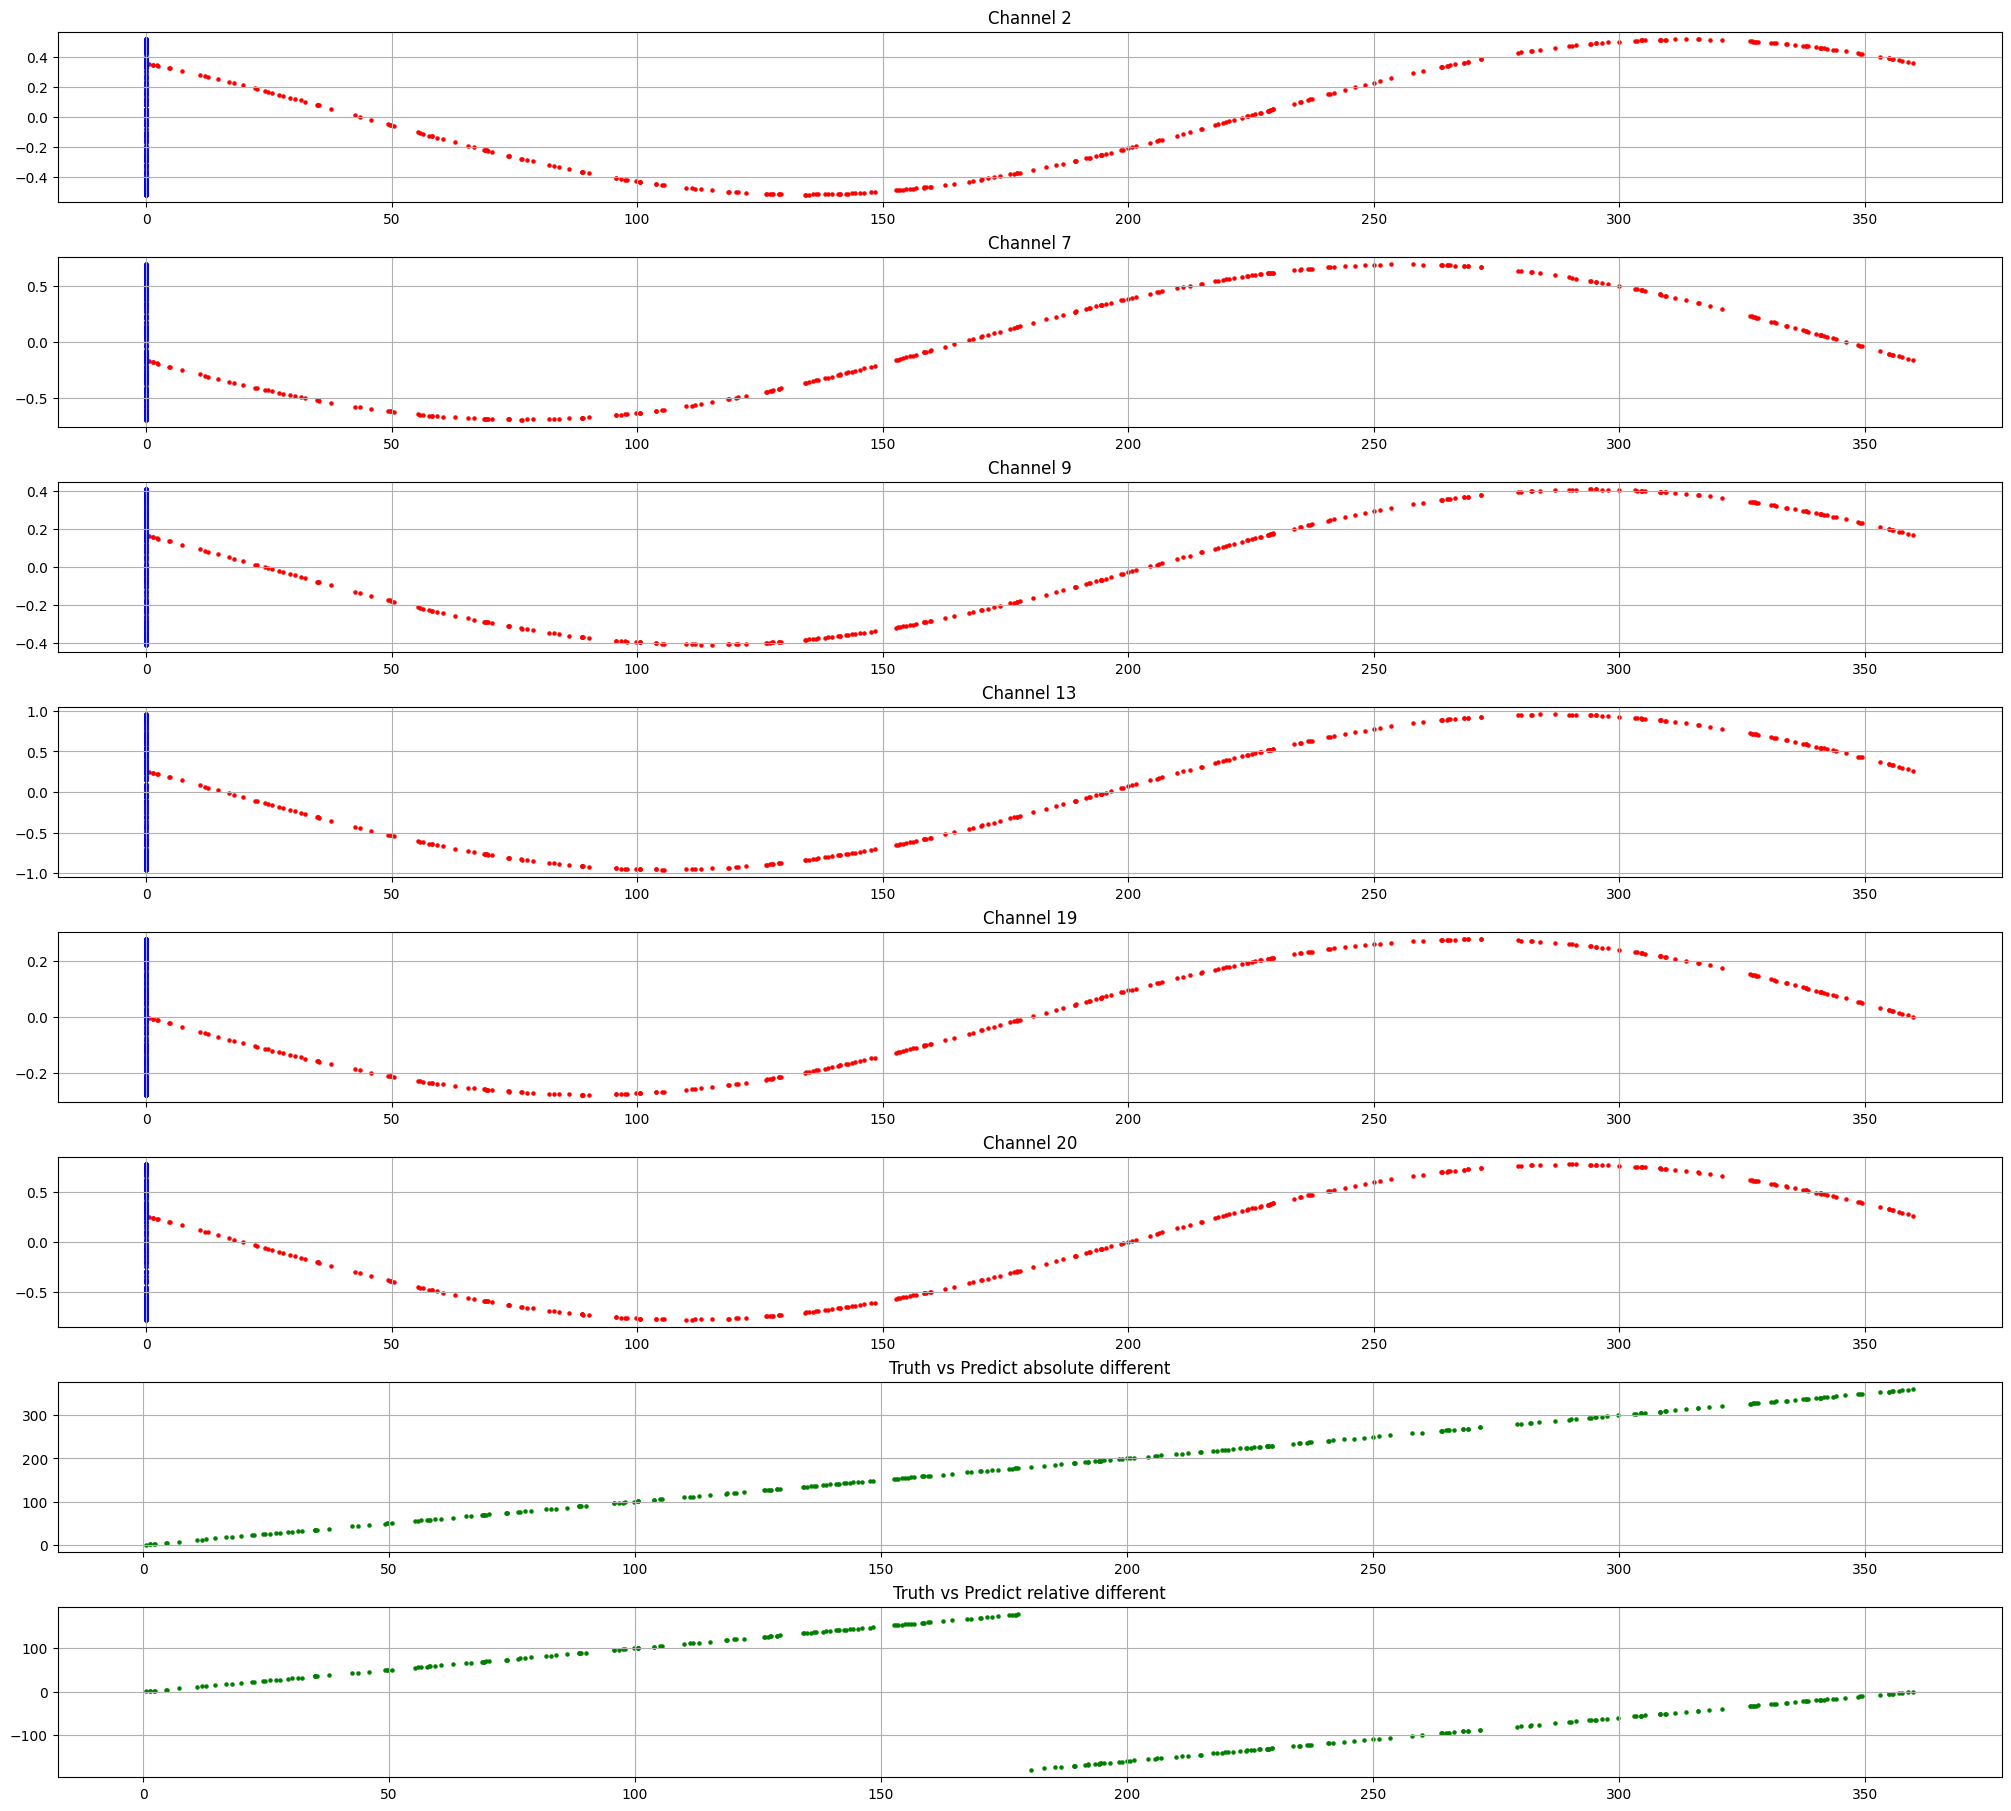

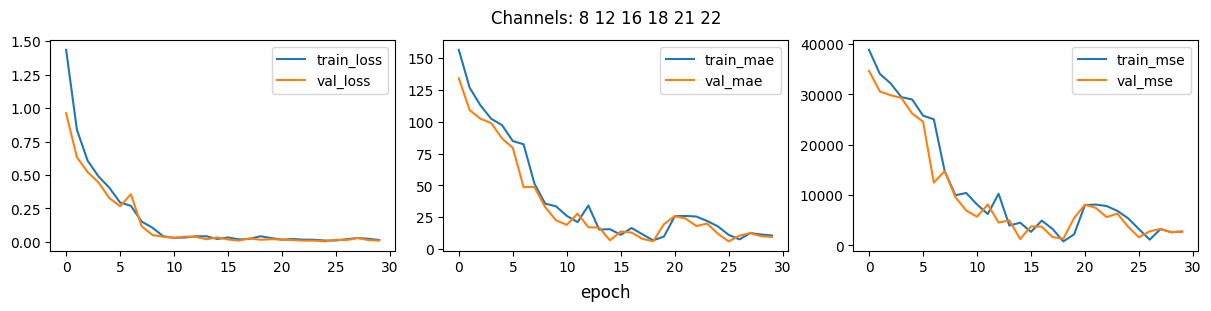

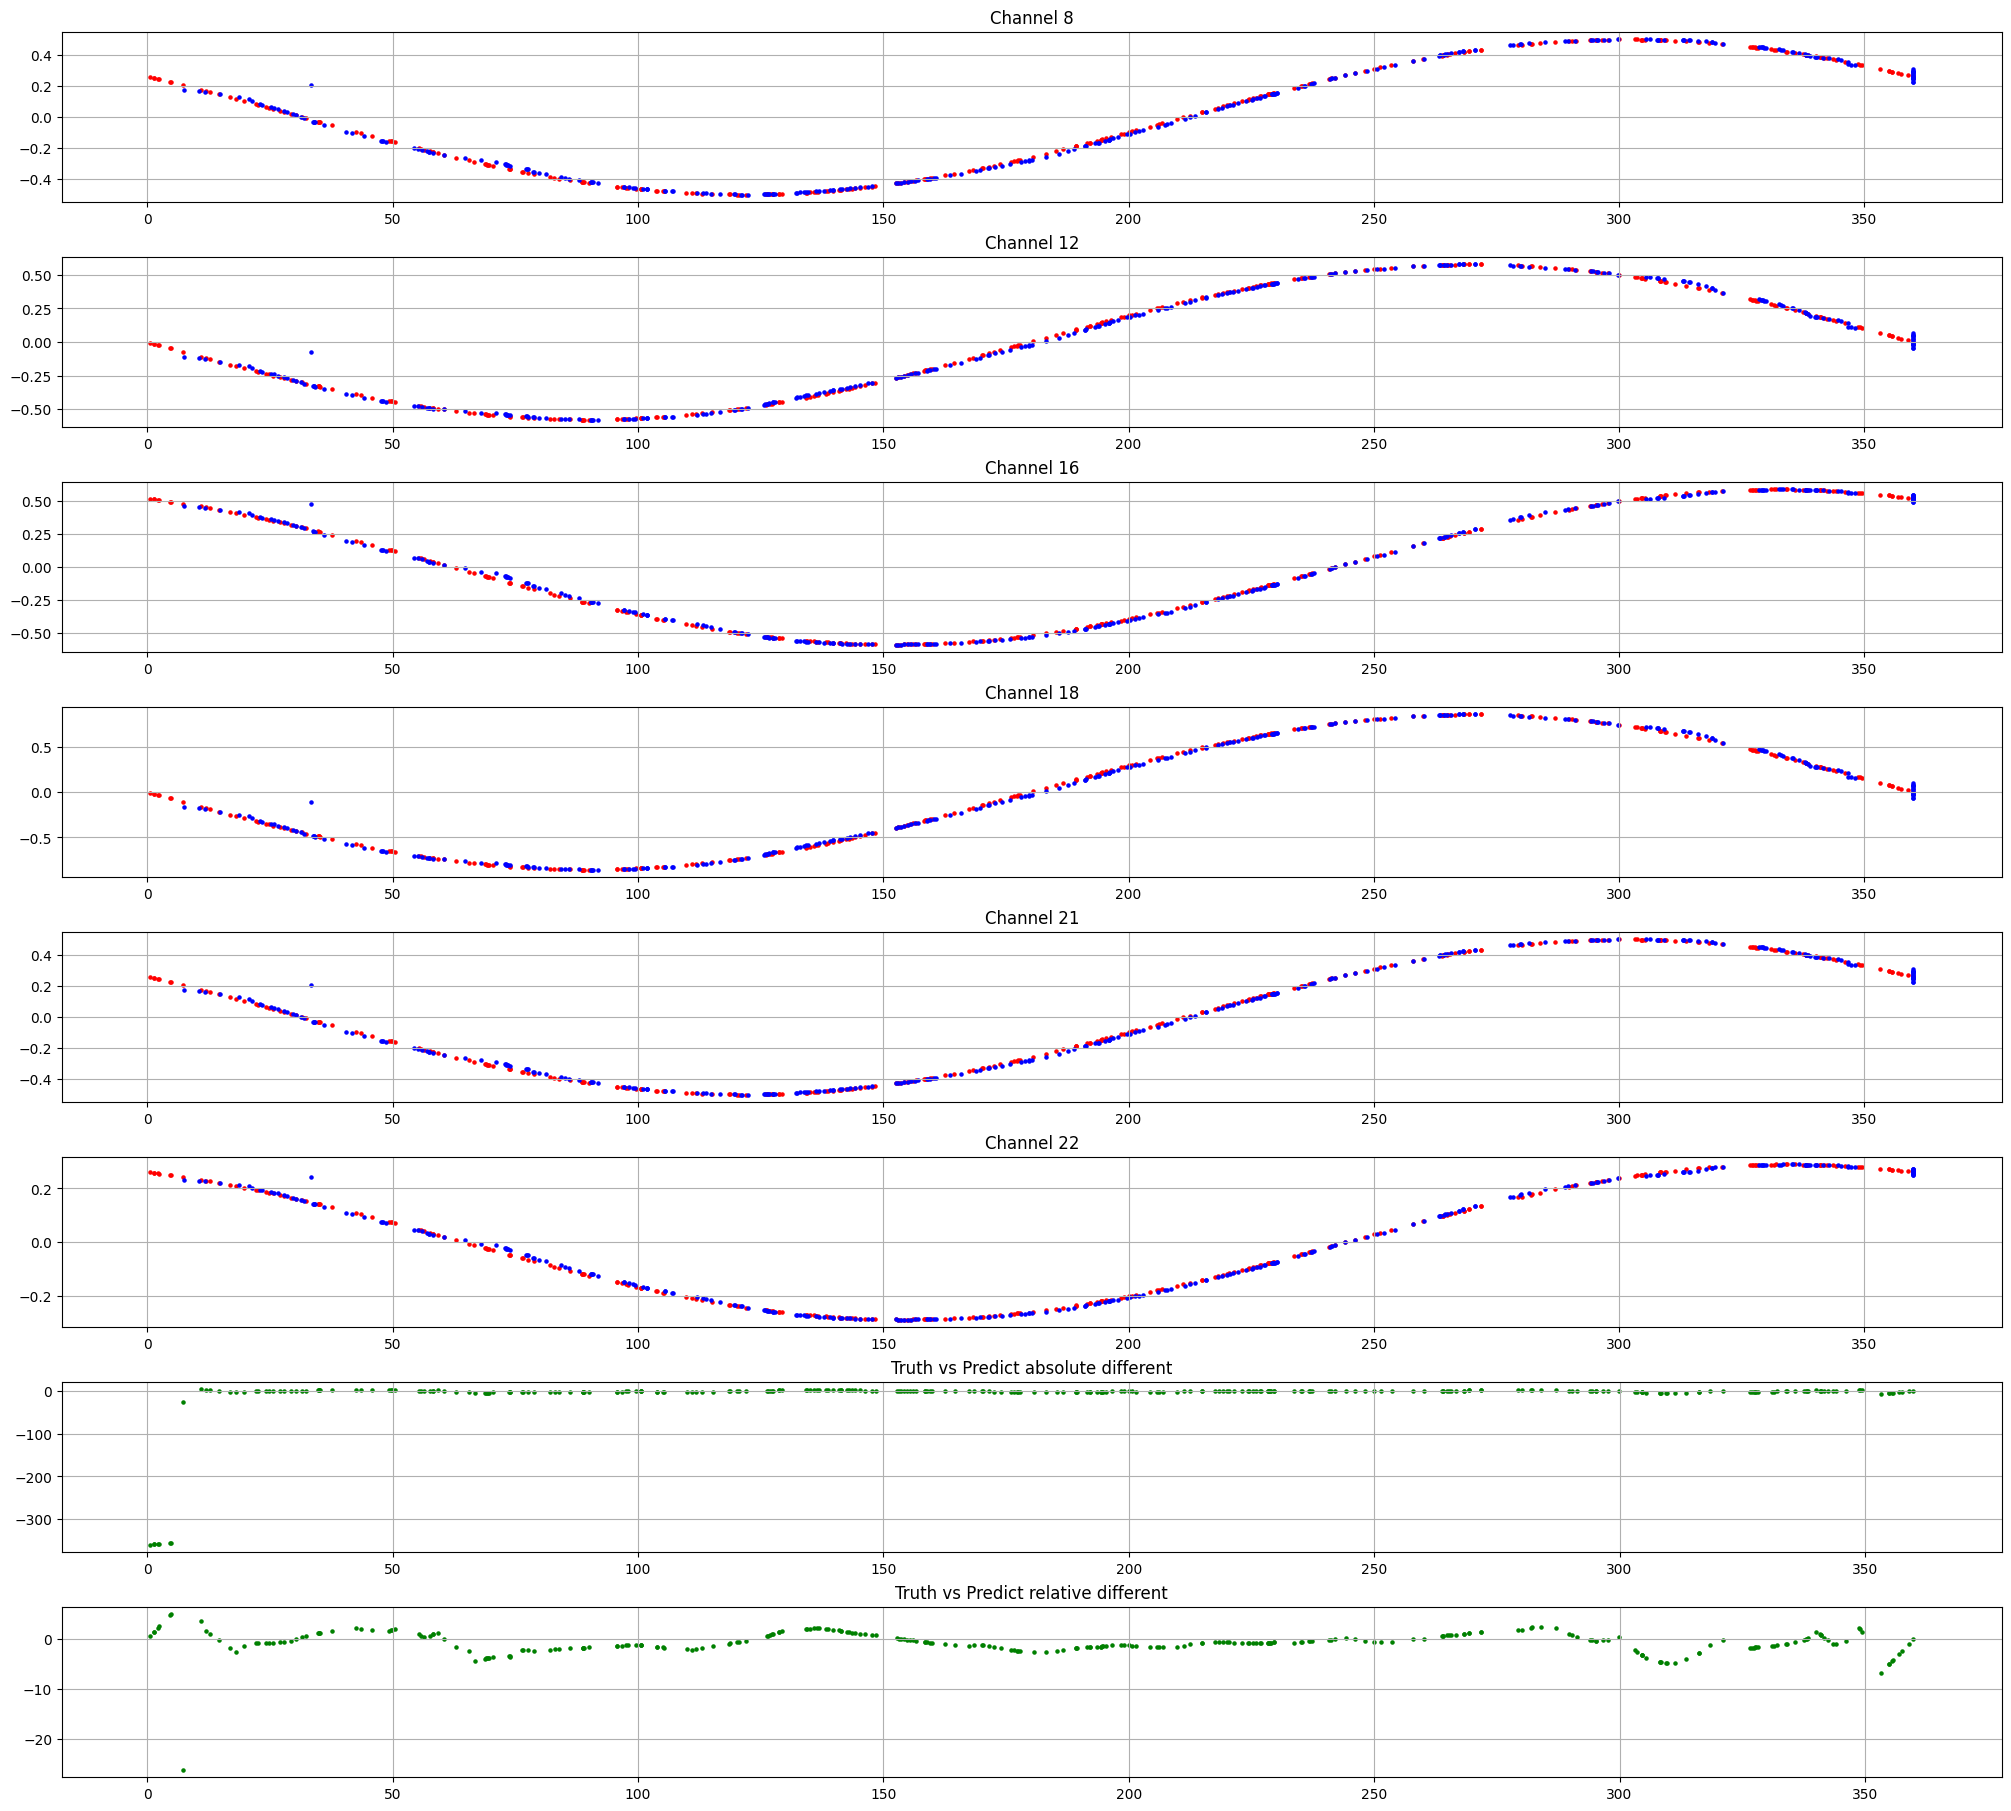

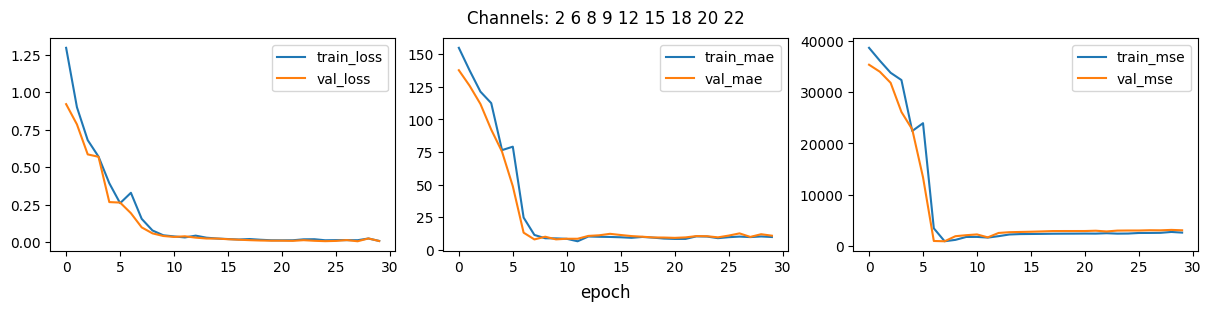

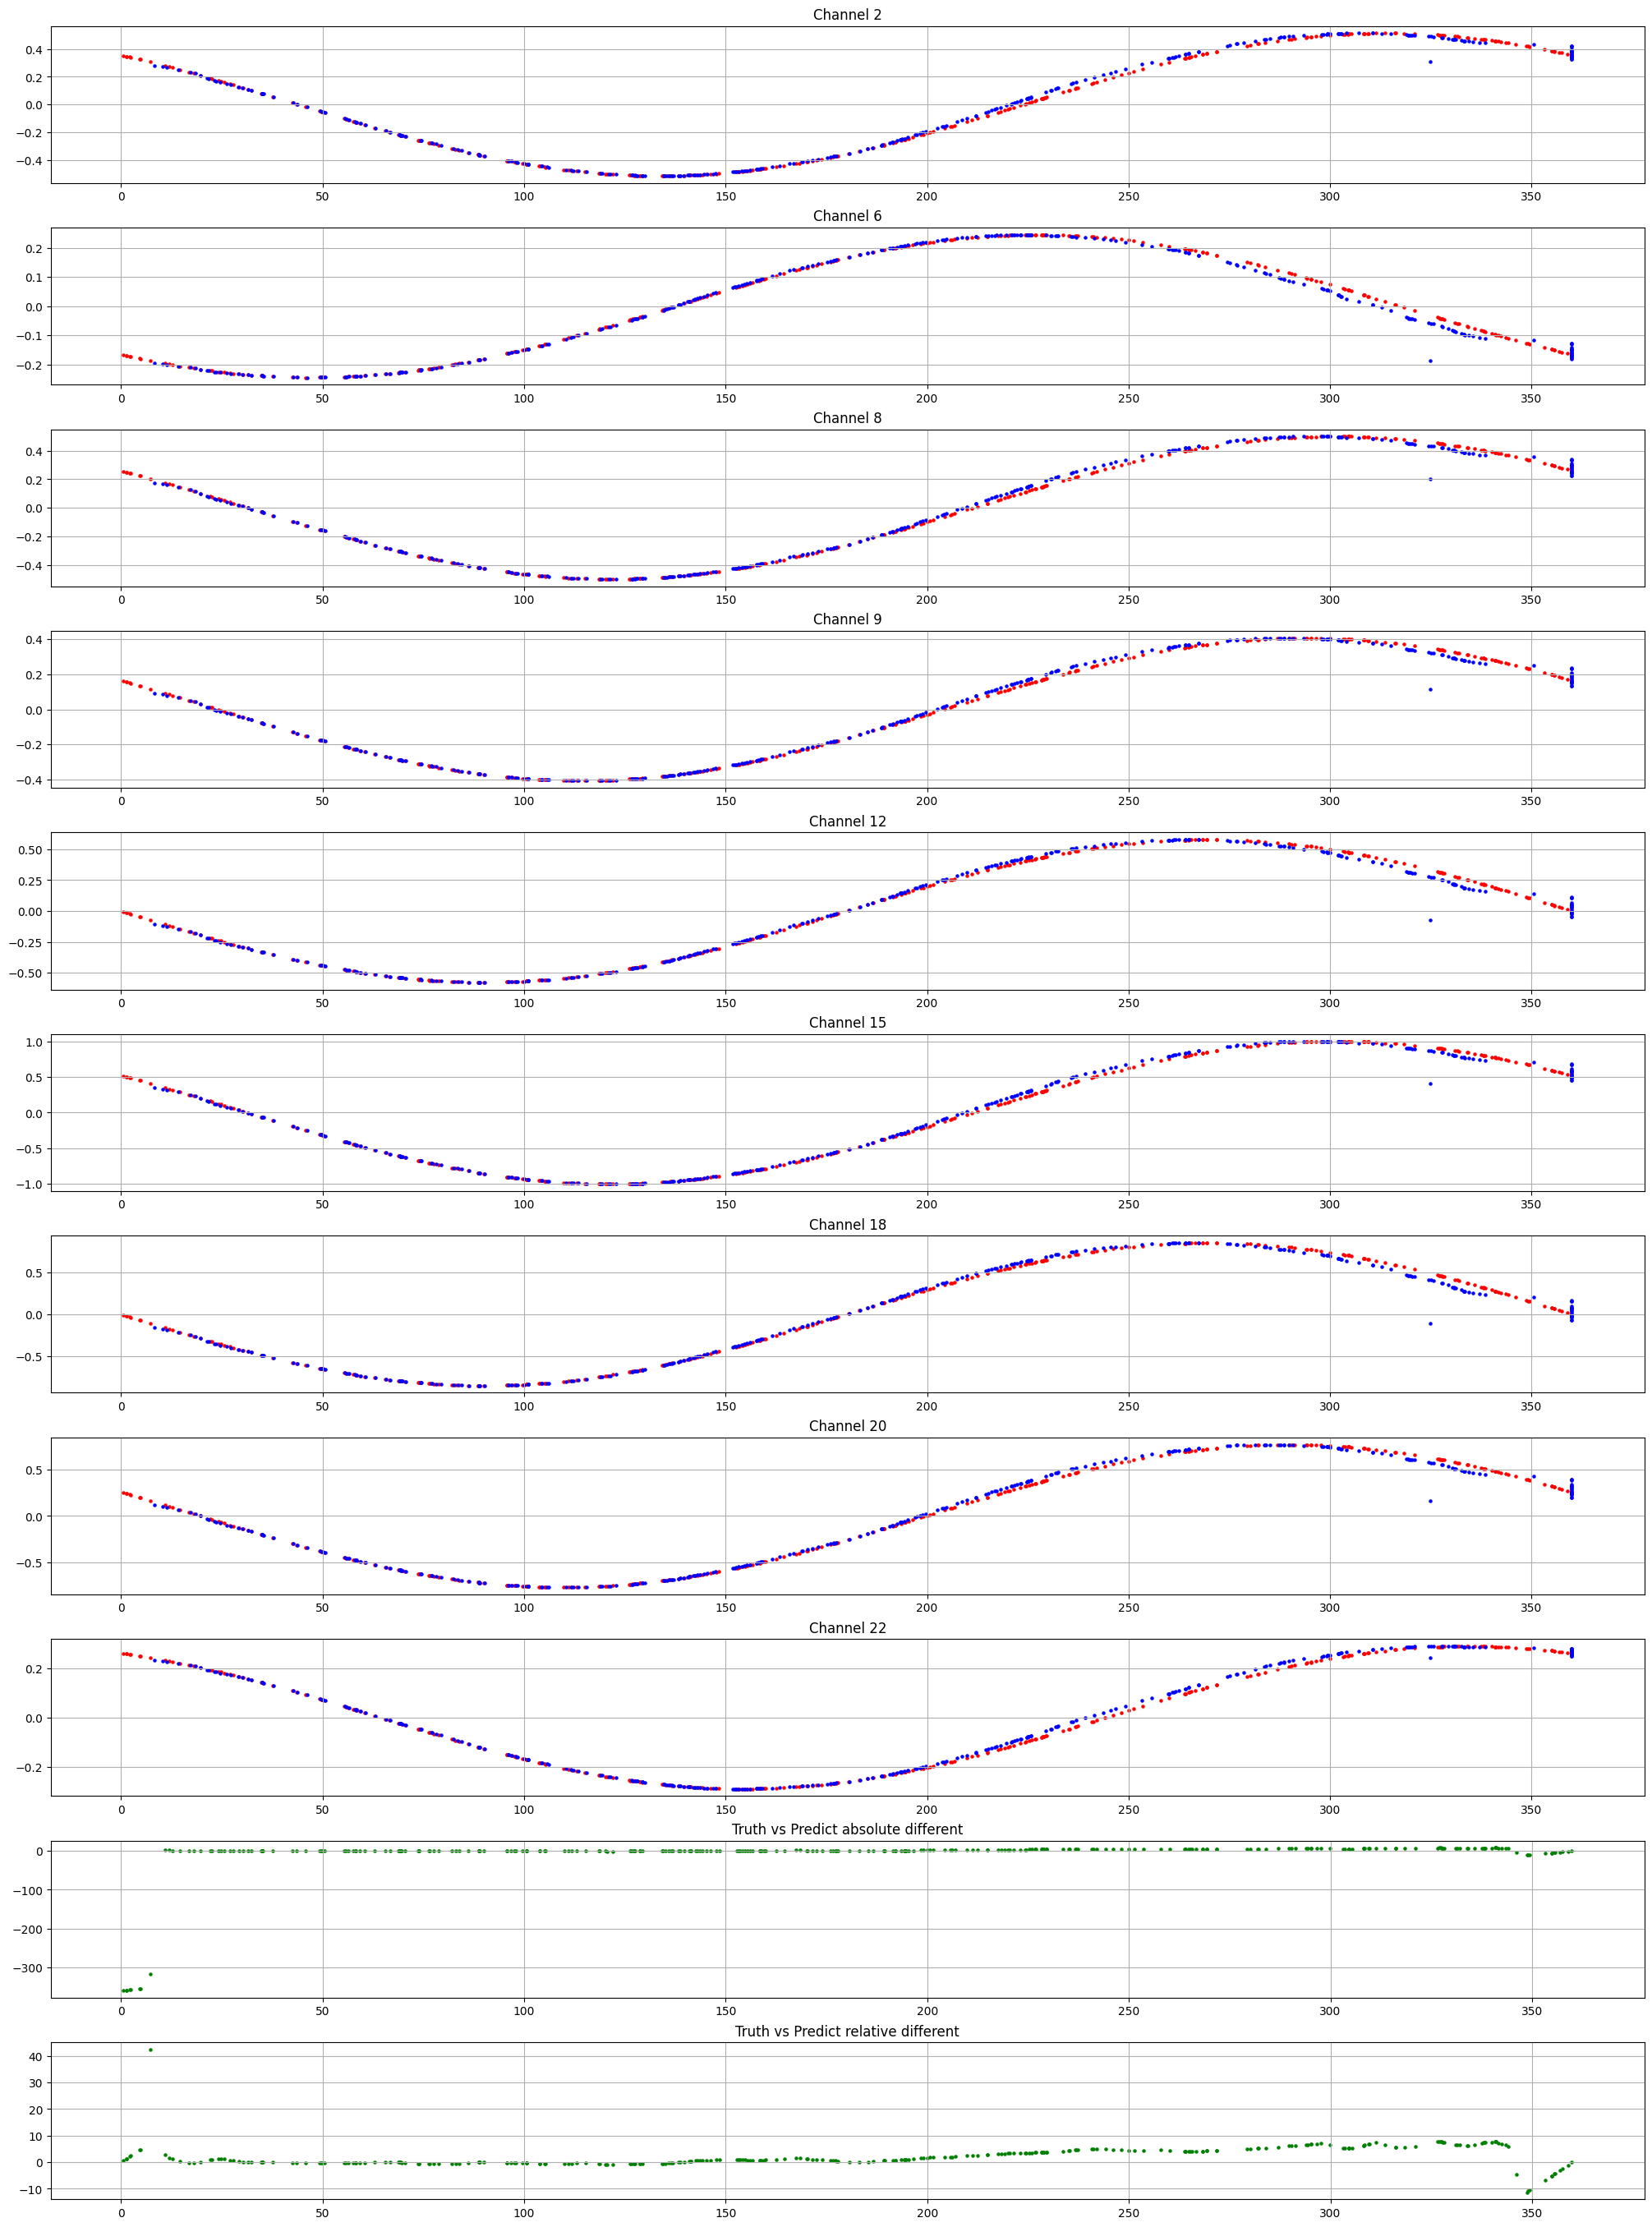

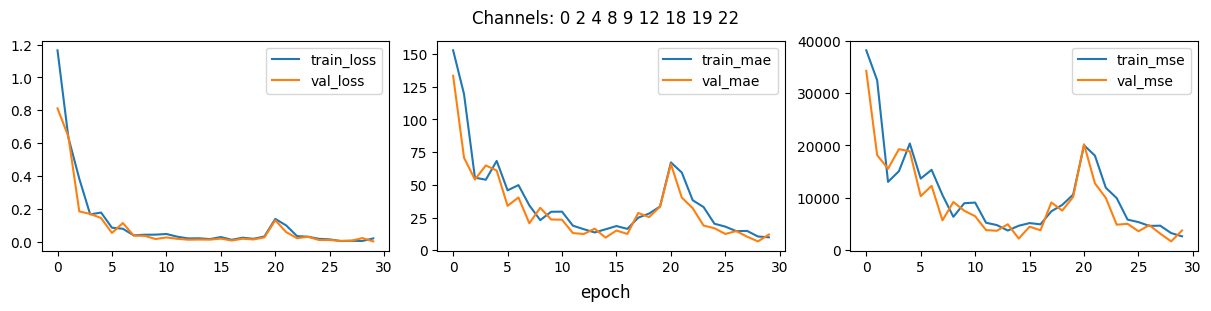

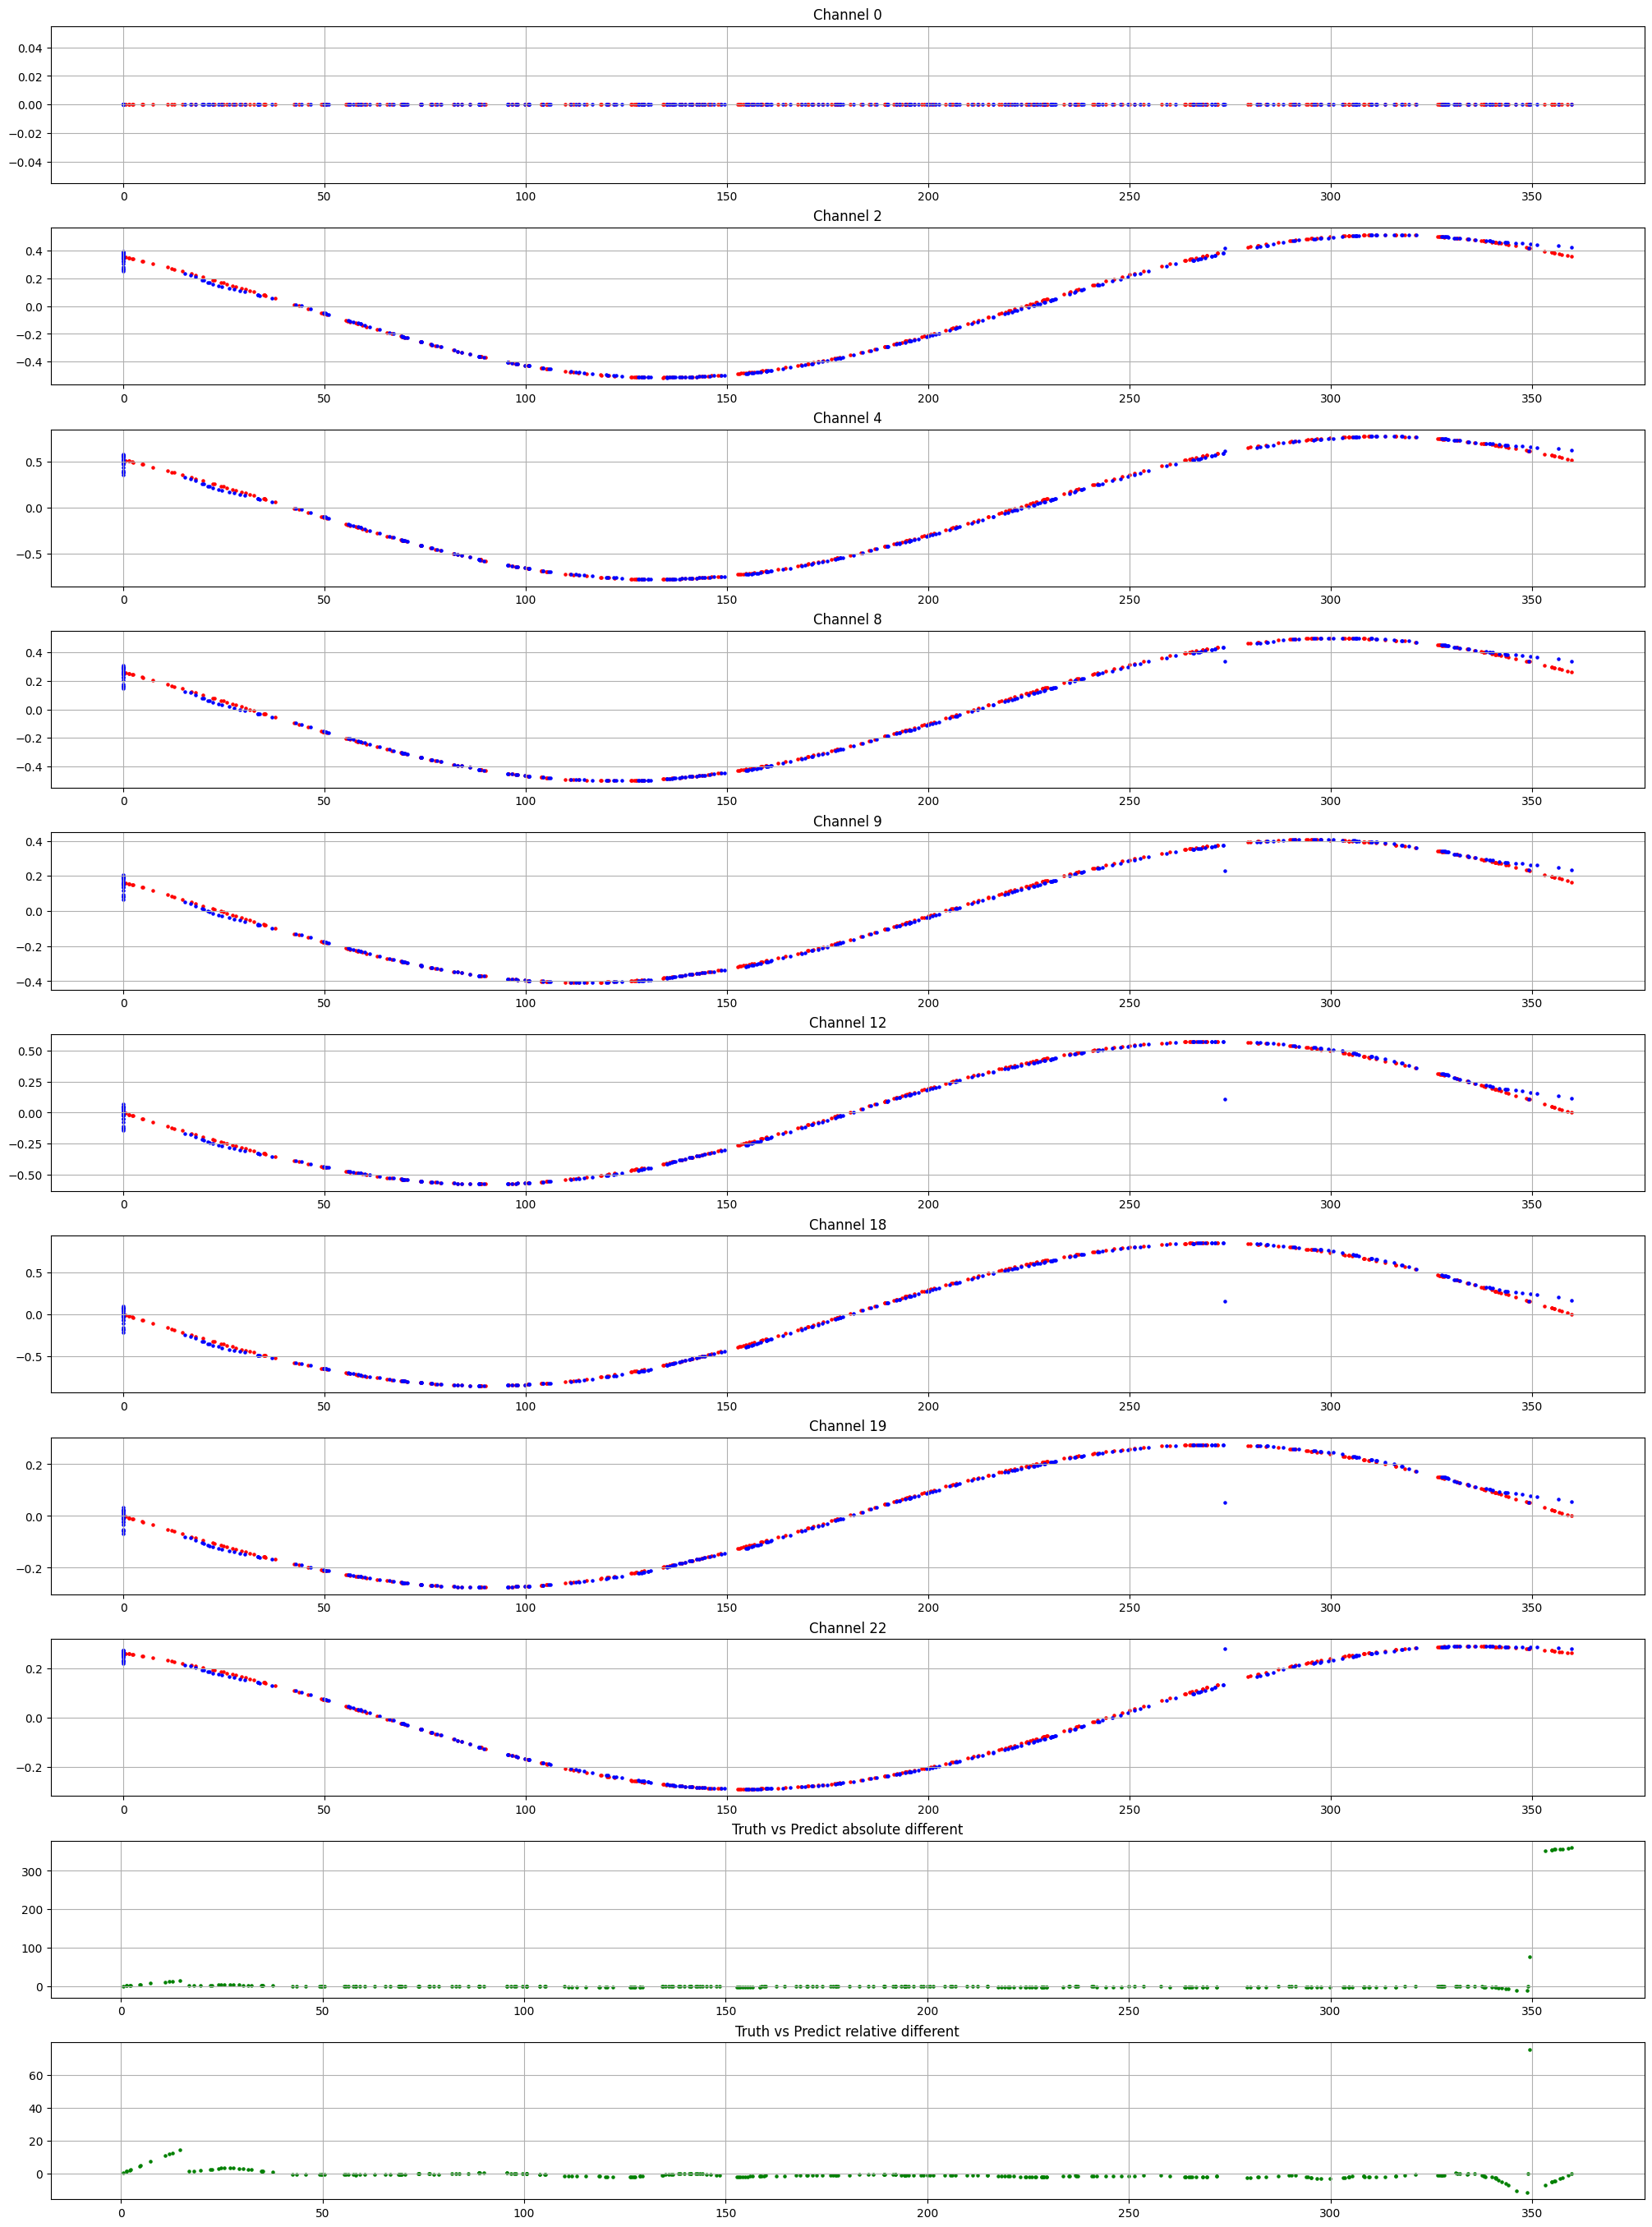

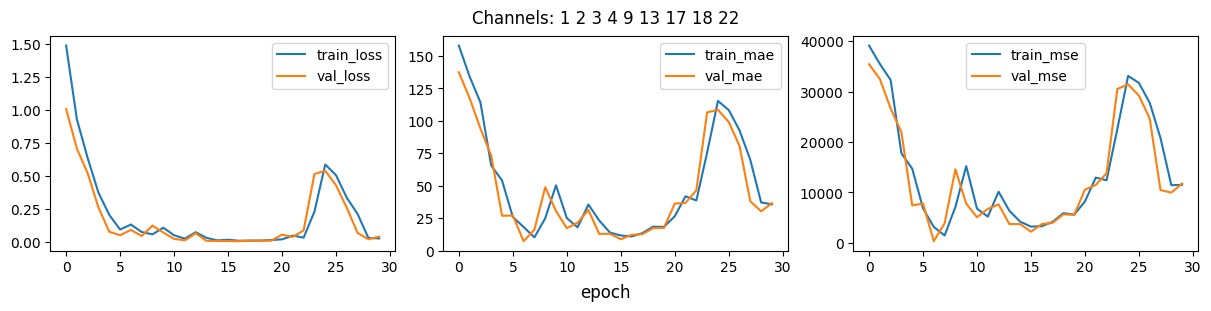

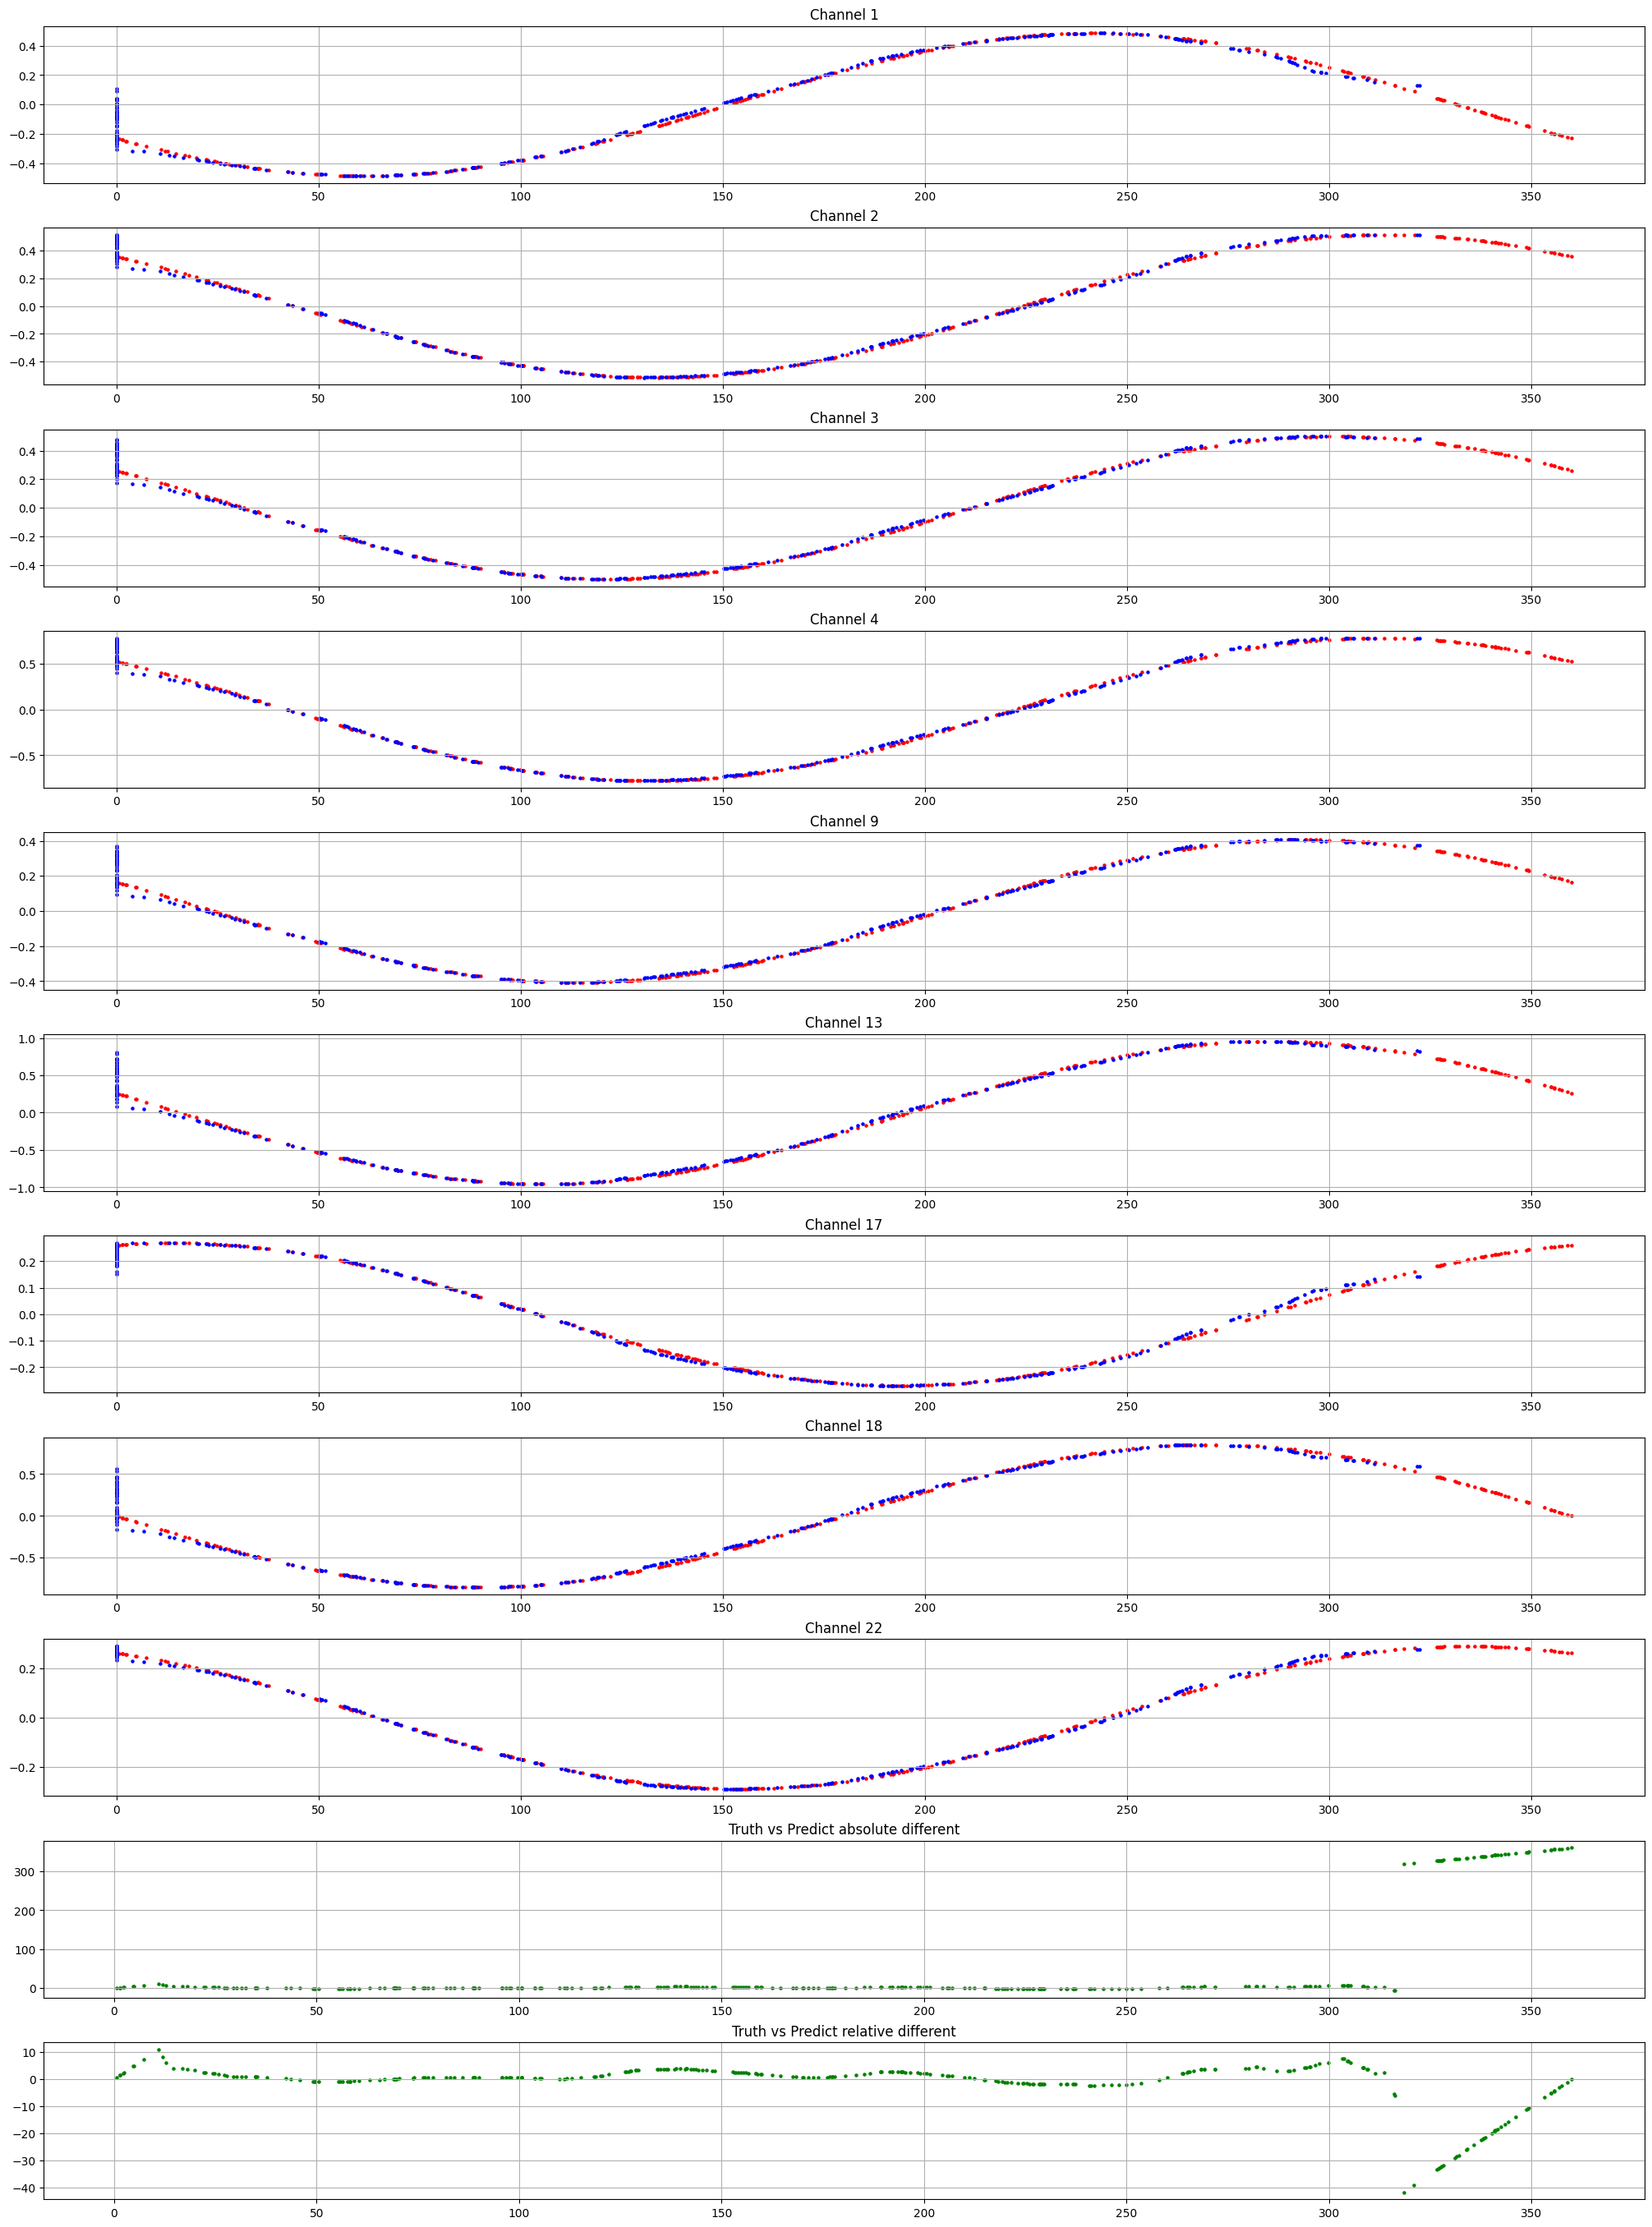

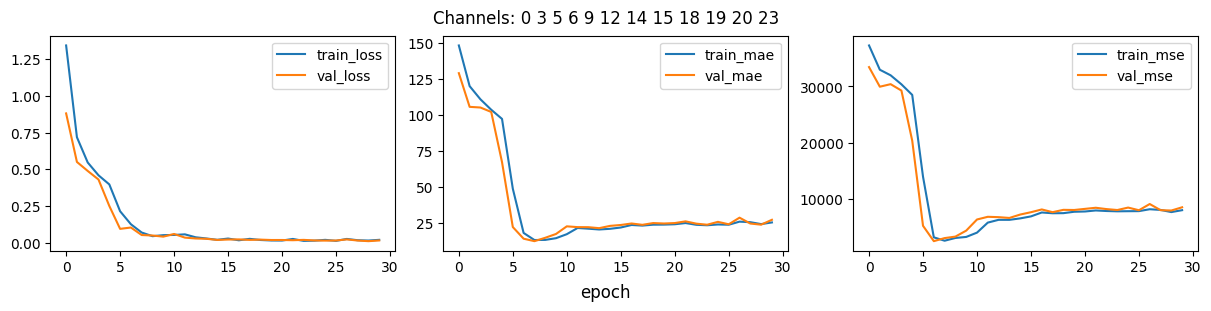

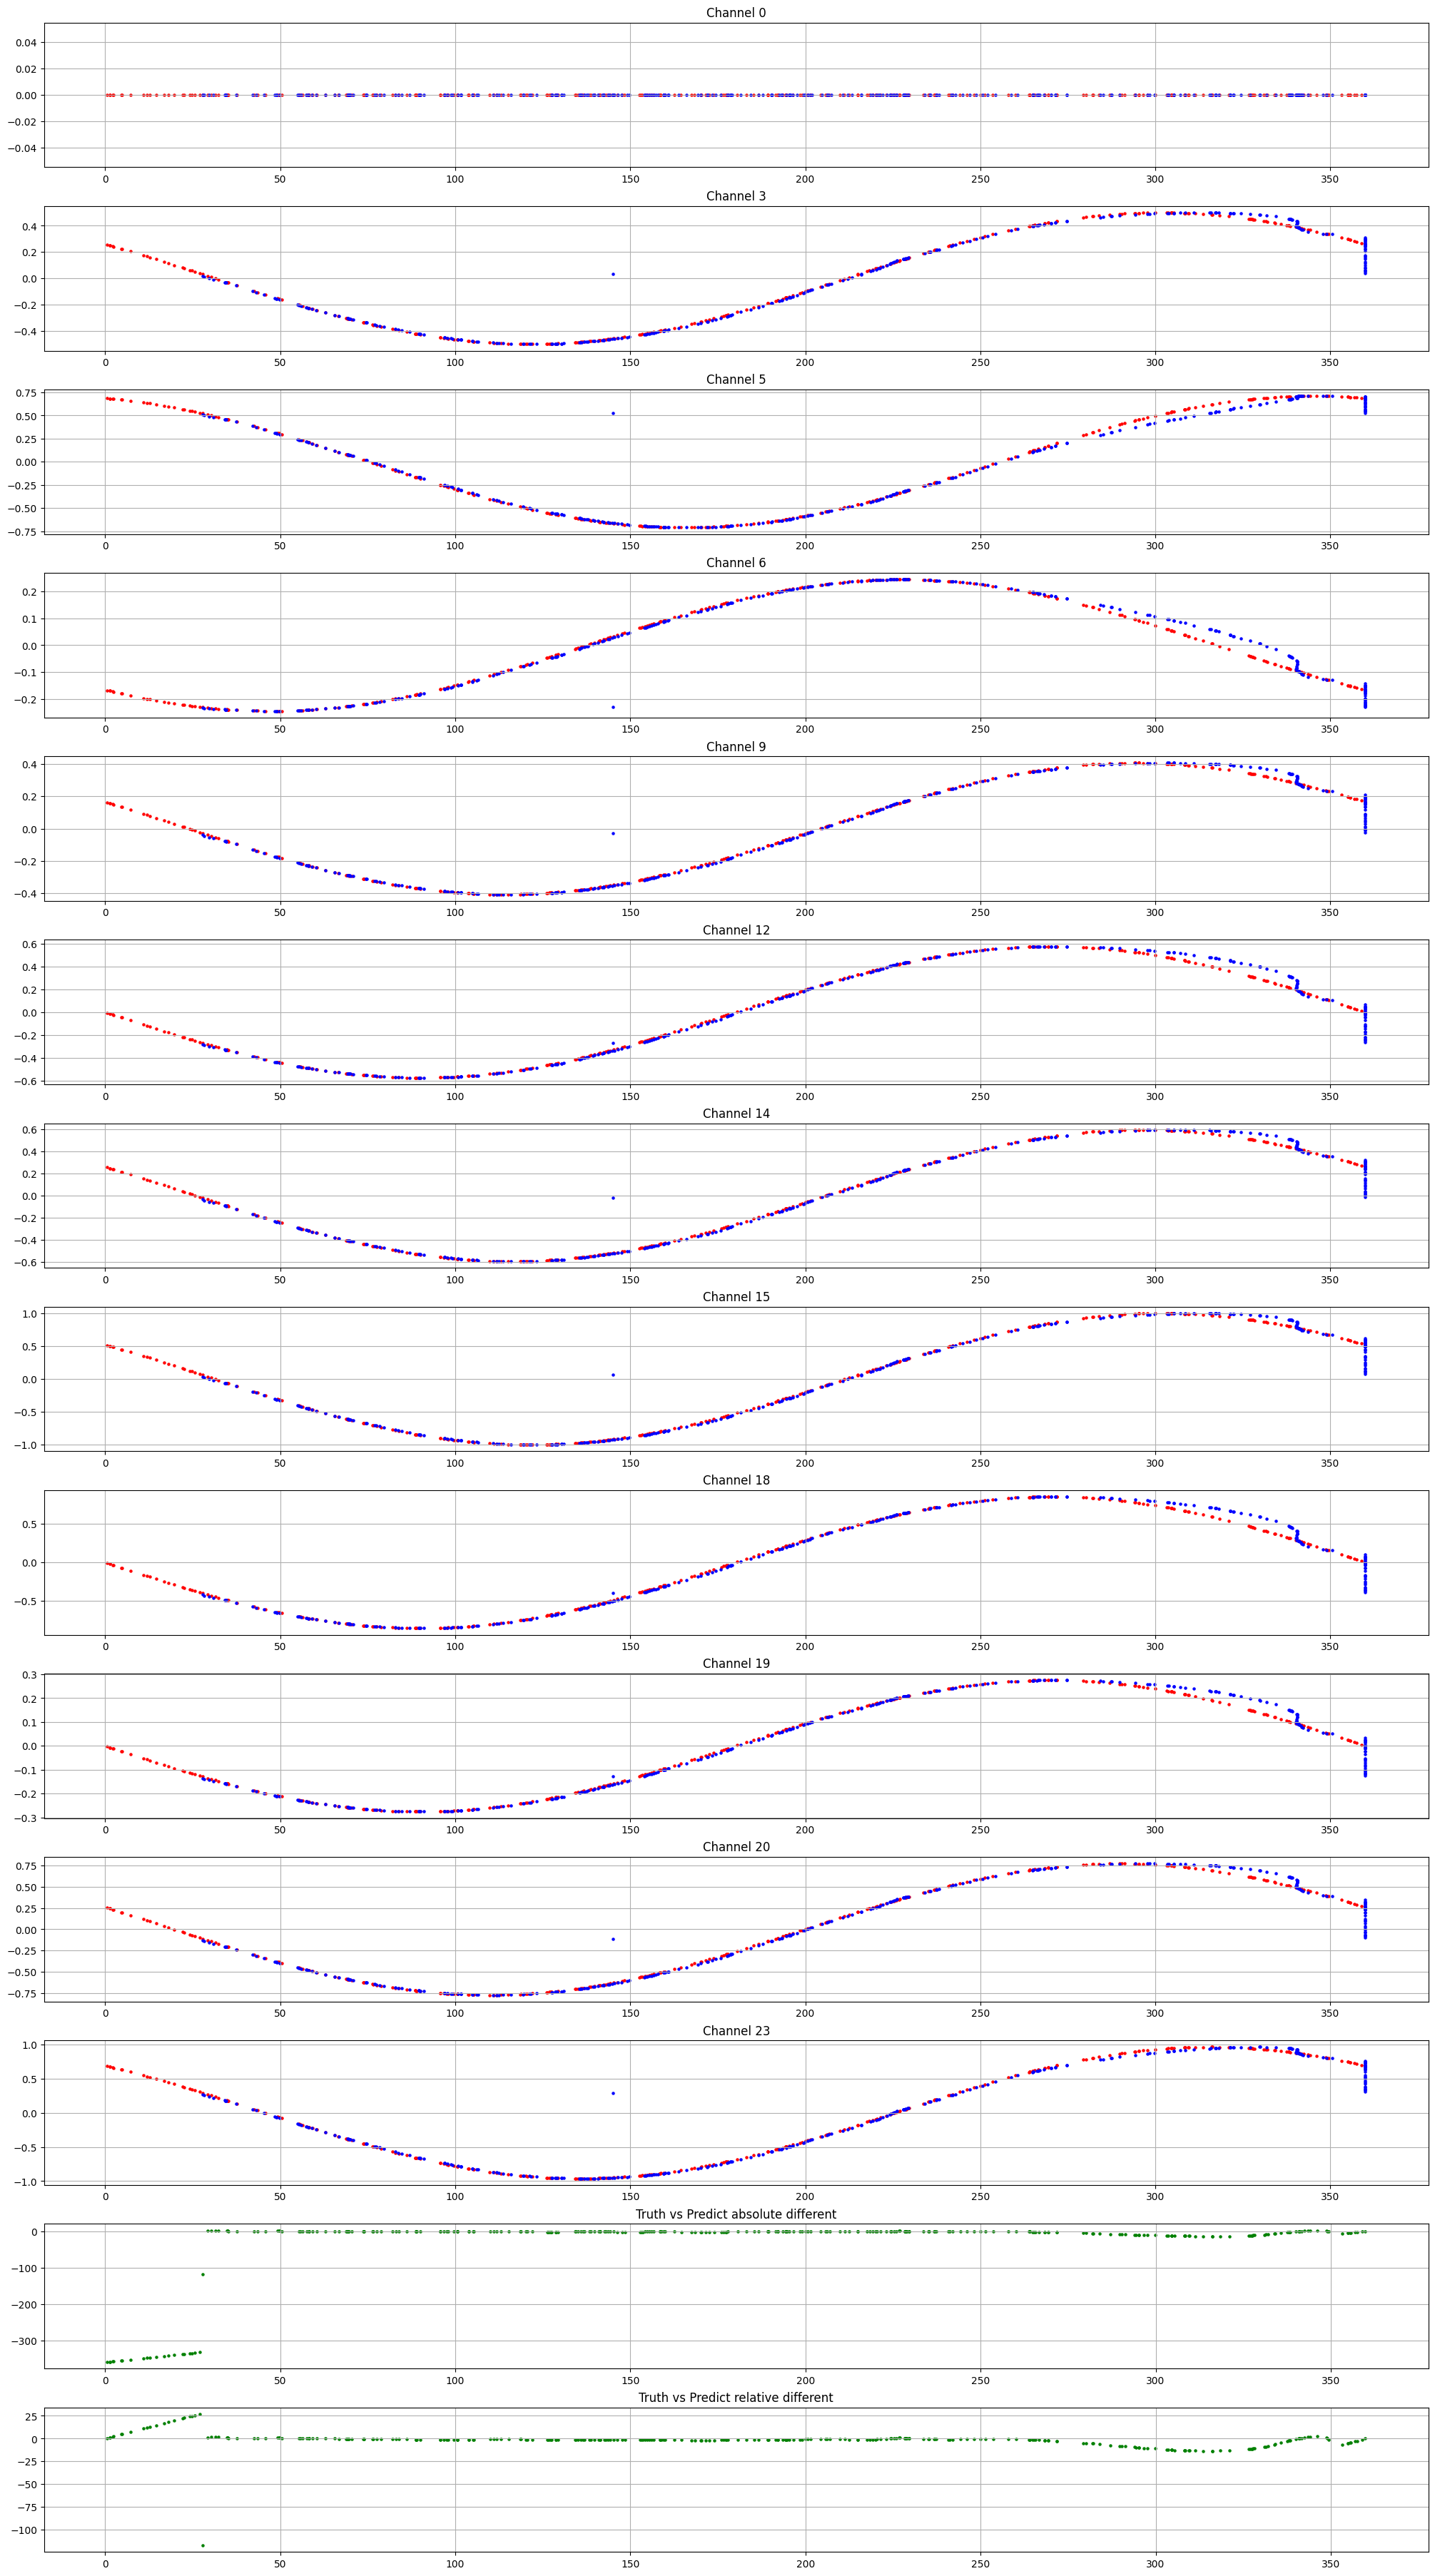

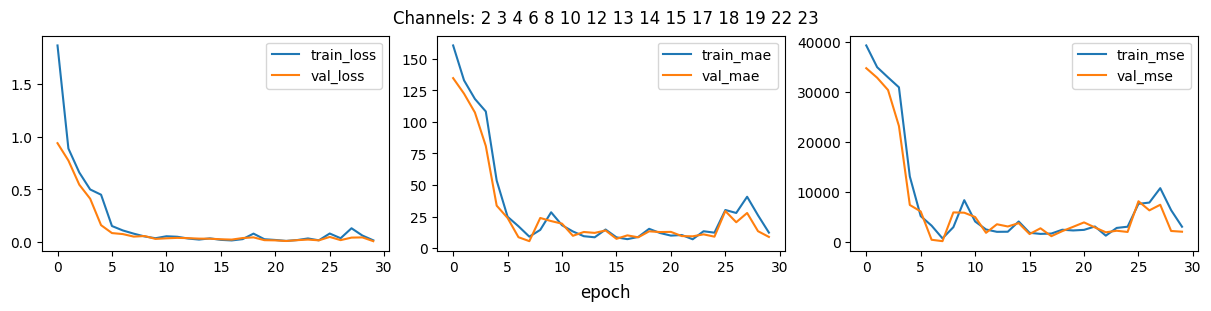

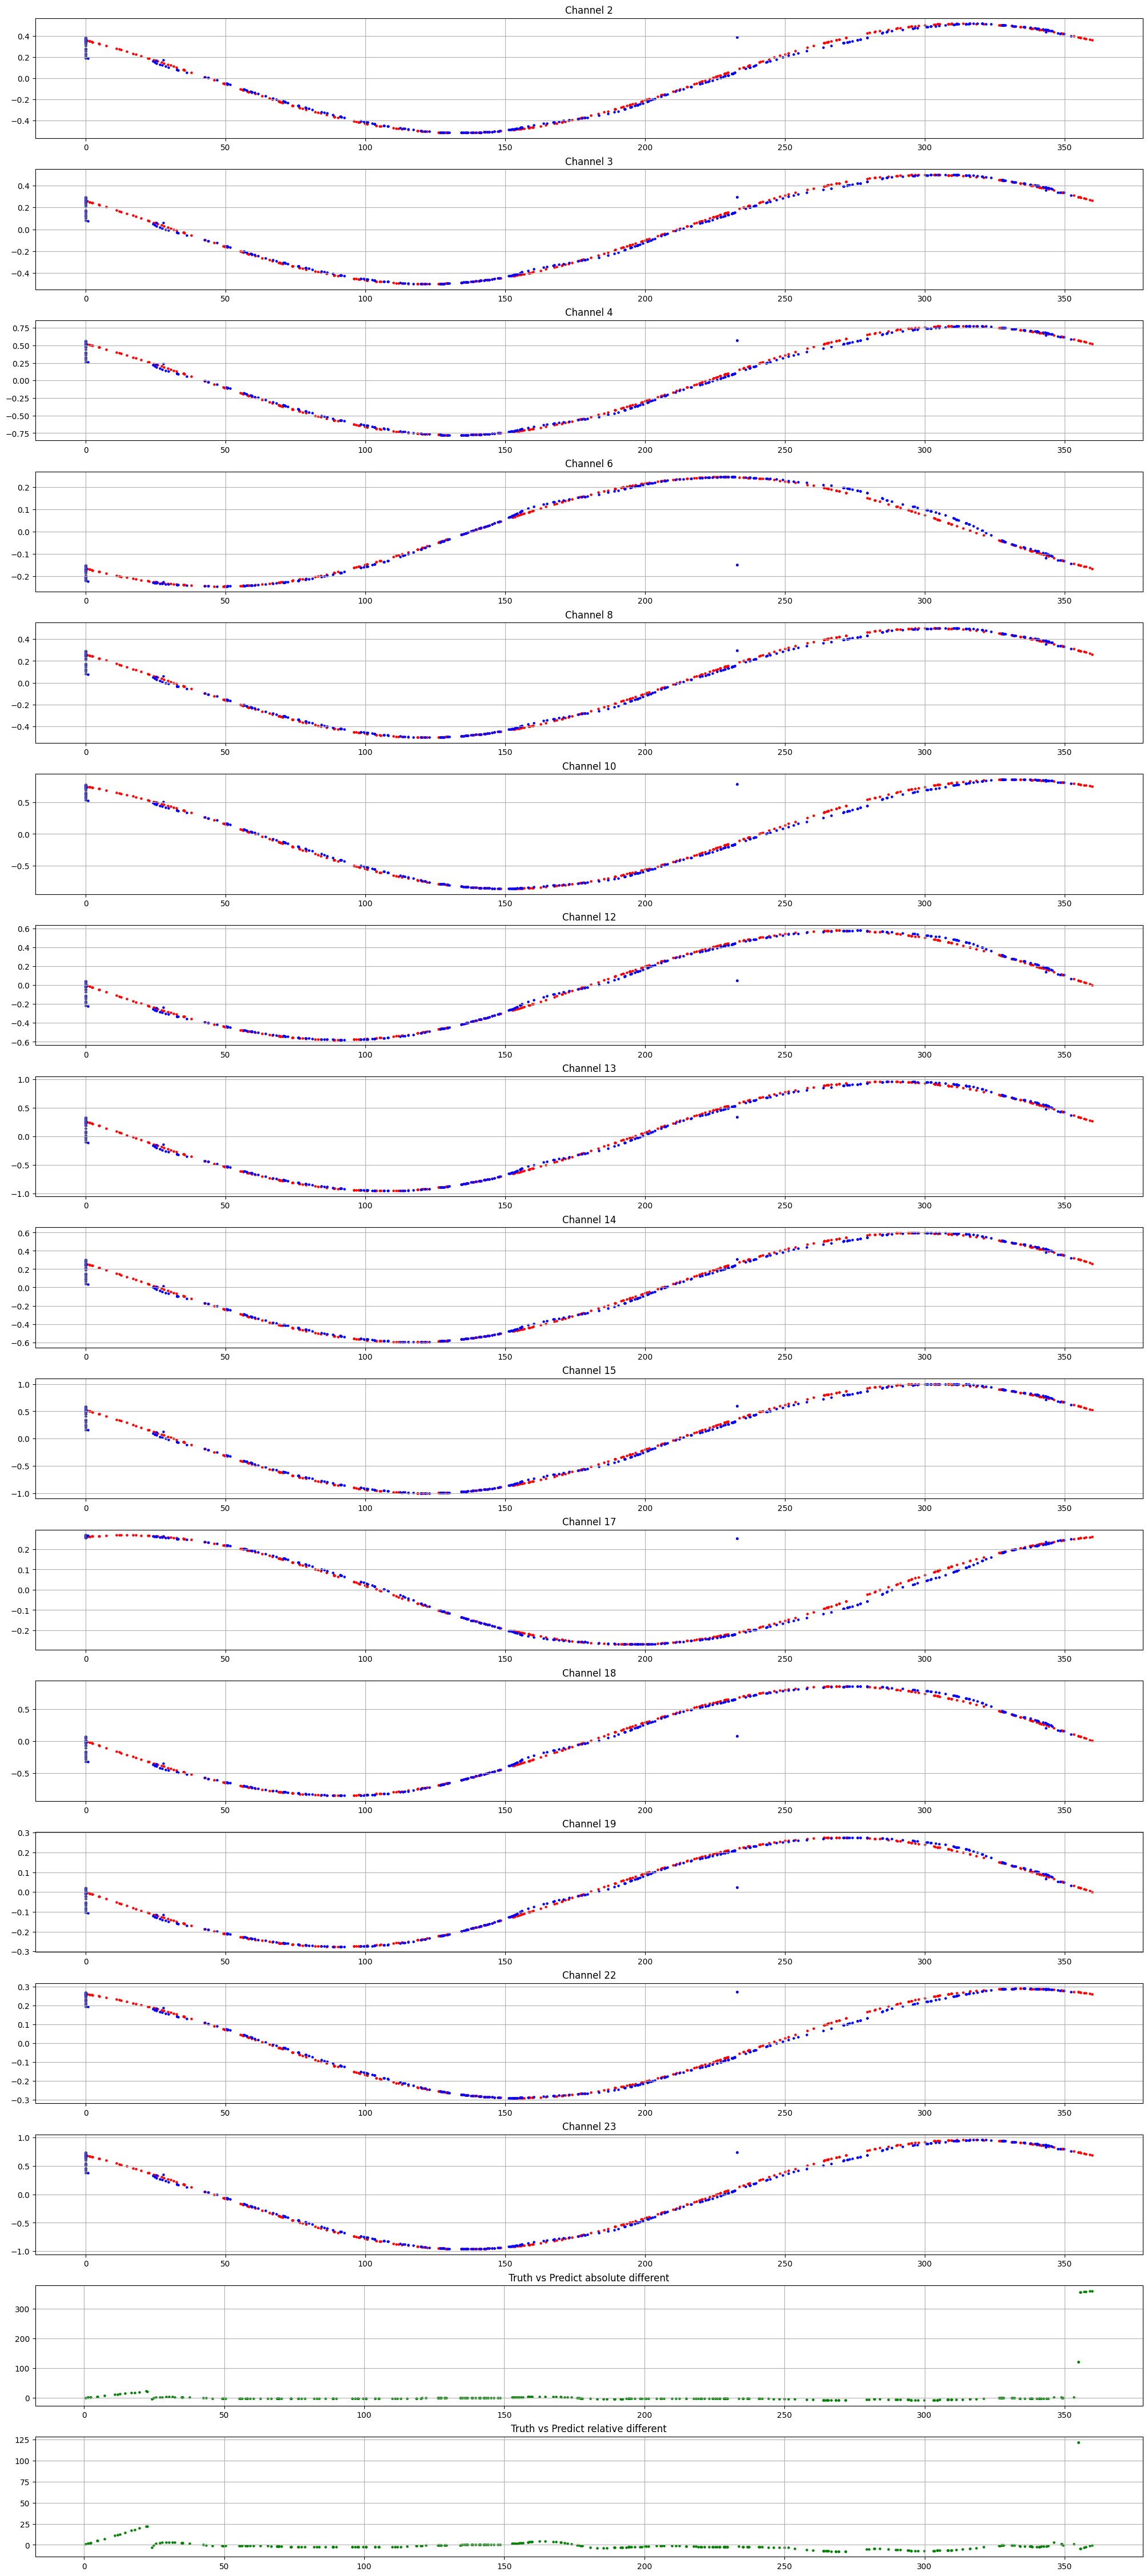

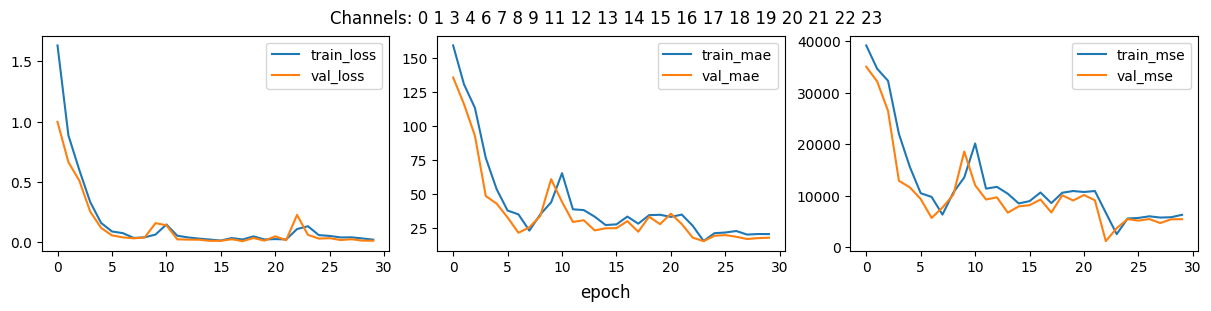

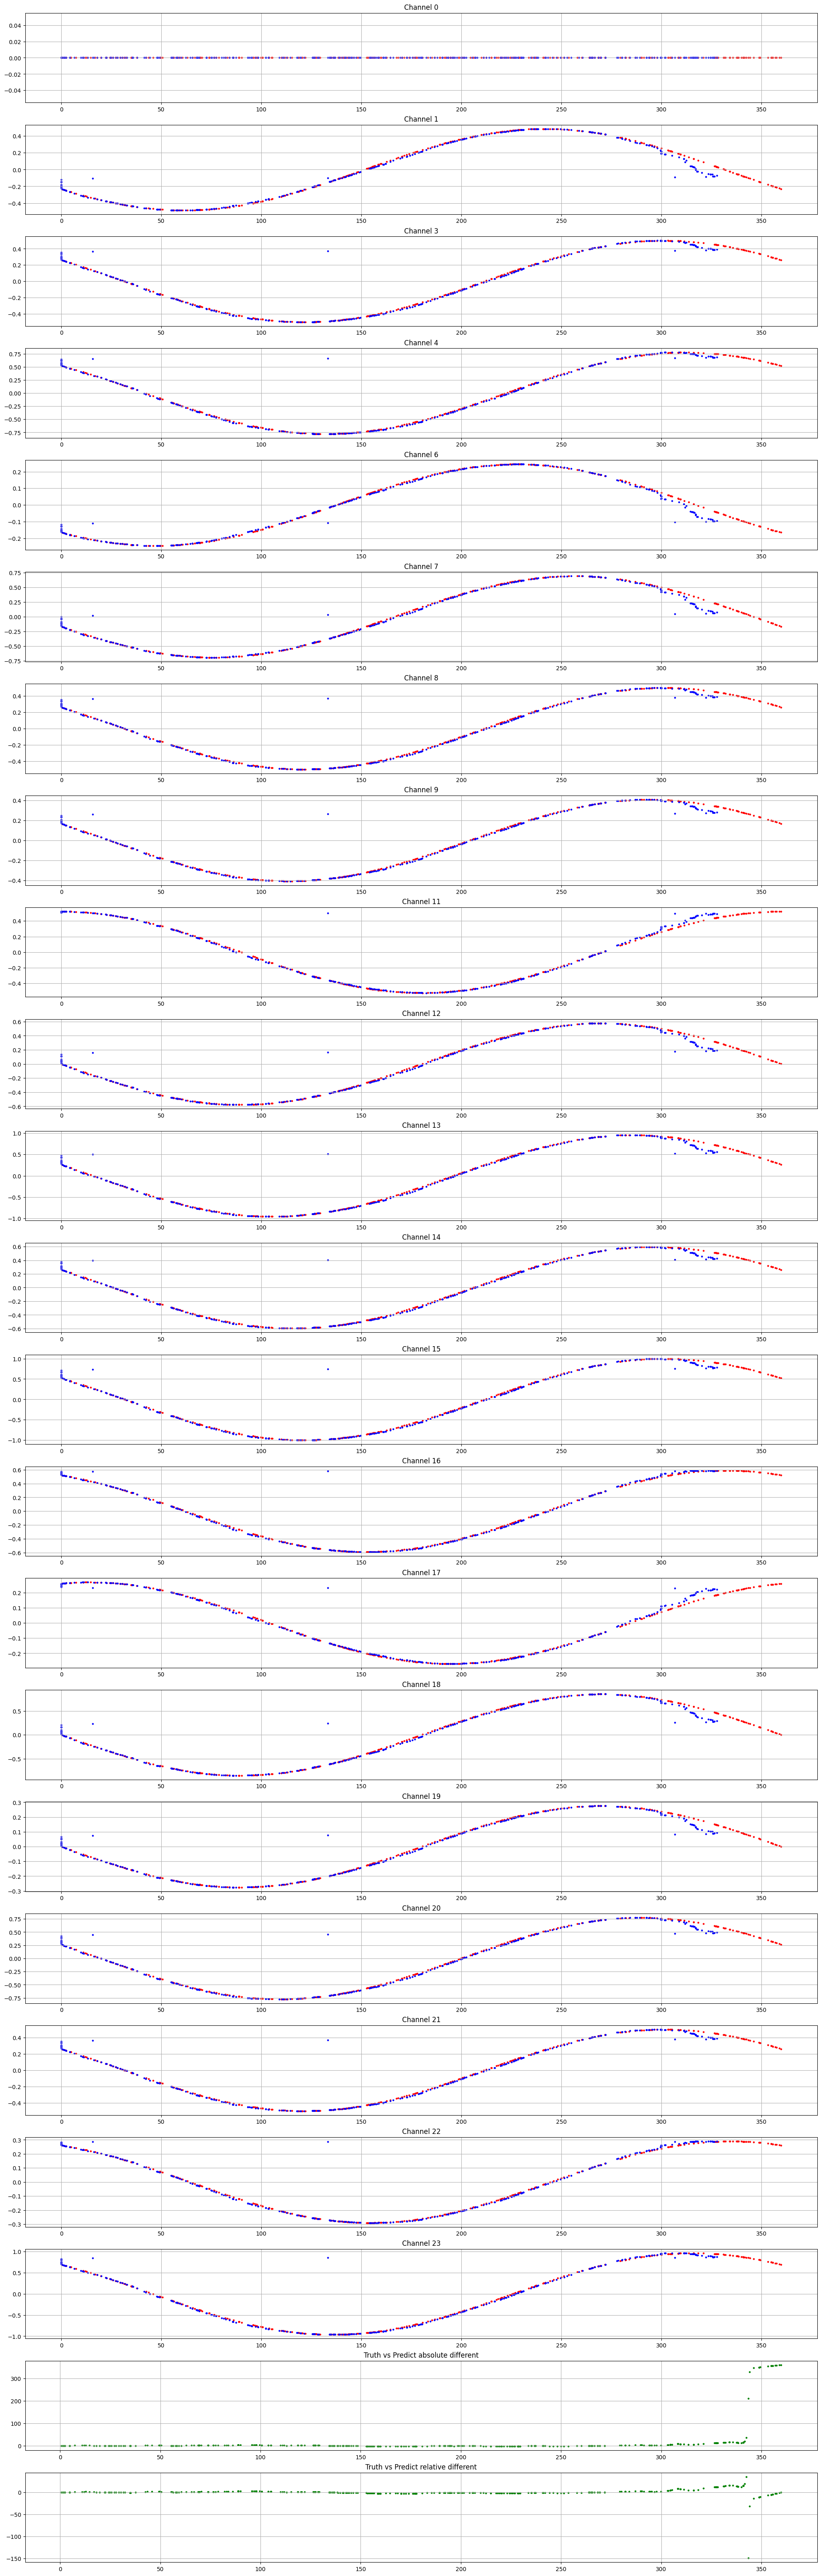

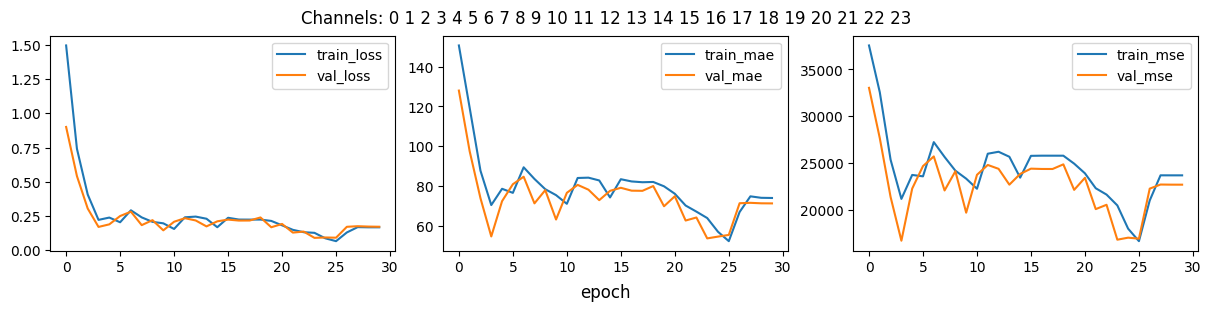

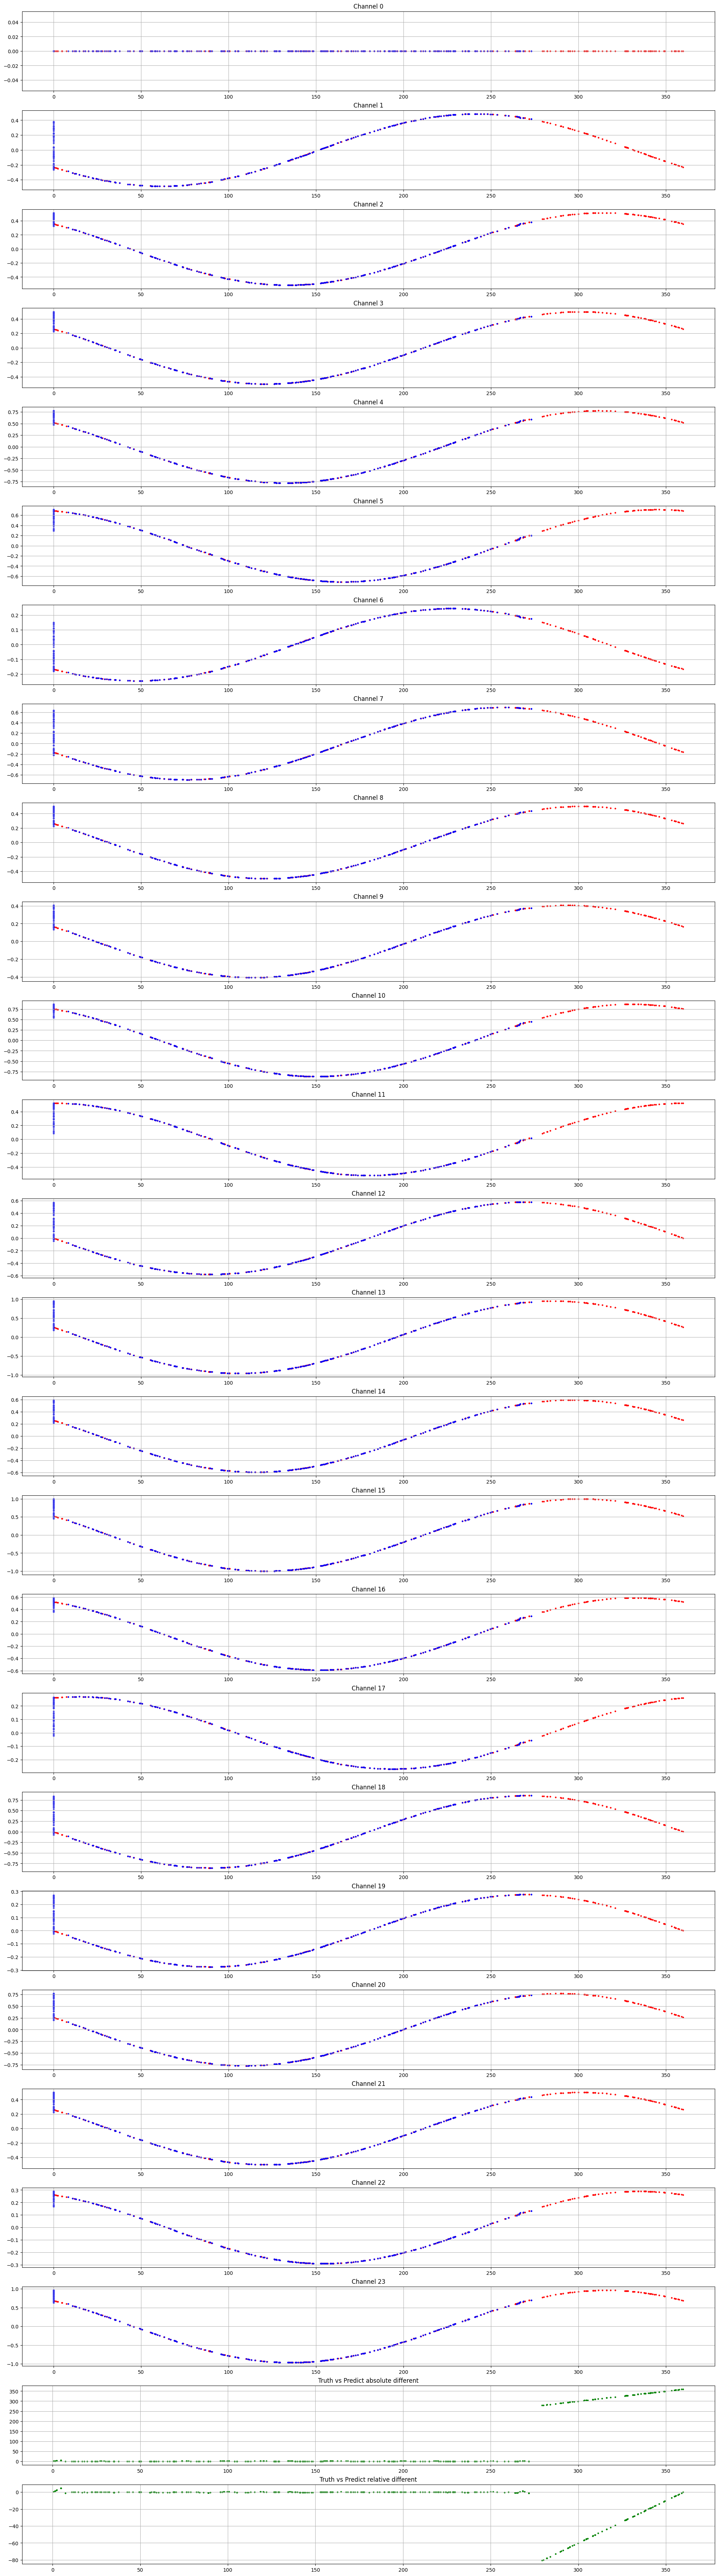

In [776]:
models, evaluates, losses = training_evaluation(top_list_channels, AA_Geometry, inputs, speeds, angles, norm, clambda=5,\
                                                he_initializer=True, \
                                                floormod=True, epochs=30, plot=True)

Inputs
tf.Tensor(
[[-0.14879133  0.05130795  0.34165585]
 [-0.15115306  0.04428053  0.33073175]
 [-0.14879133  0.05130795  0.34165585]
 [-0.15148866  0.04327586  0.32916683]
 [-0.16197723  0.01108038  0.27859592]
 [-0.15744871  0.0251762   0.3008371 ]
 [-0.16515276  0.00100747  0.2626068 ]
 [-0.15547898  0.03121306  0.3103147 ]
 [-0.14296402  0.06834008  0.36796954]], shape=(9, 3), dtype=float32)
Y Truth Y Predict
[[354.9      158.70209 ]
 [355.6       53.44722 ]
 [354.9      158.70209 ]
 [355.7       34.686886]
 [358.9        0.      ]
 [357.5        0.      ]
 [359.9        0.      ]
 [356.9        0.      ]
 [353.2      329.614   ]]


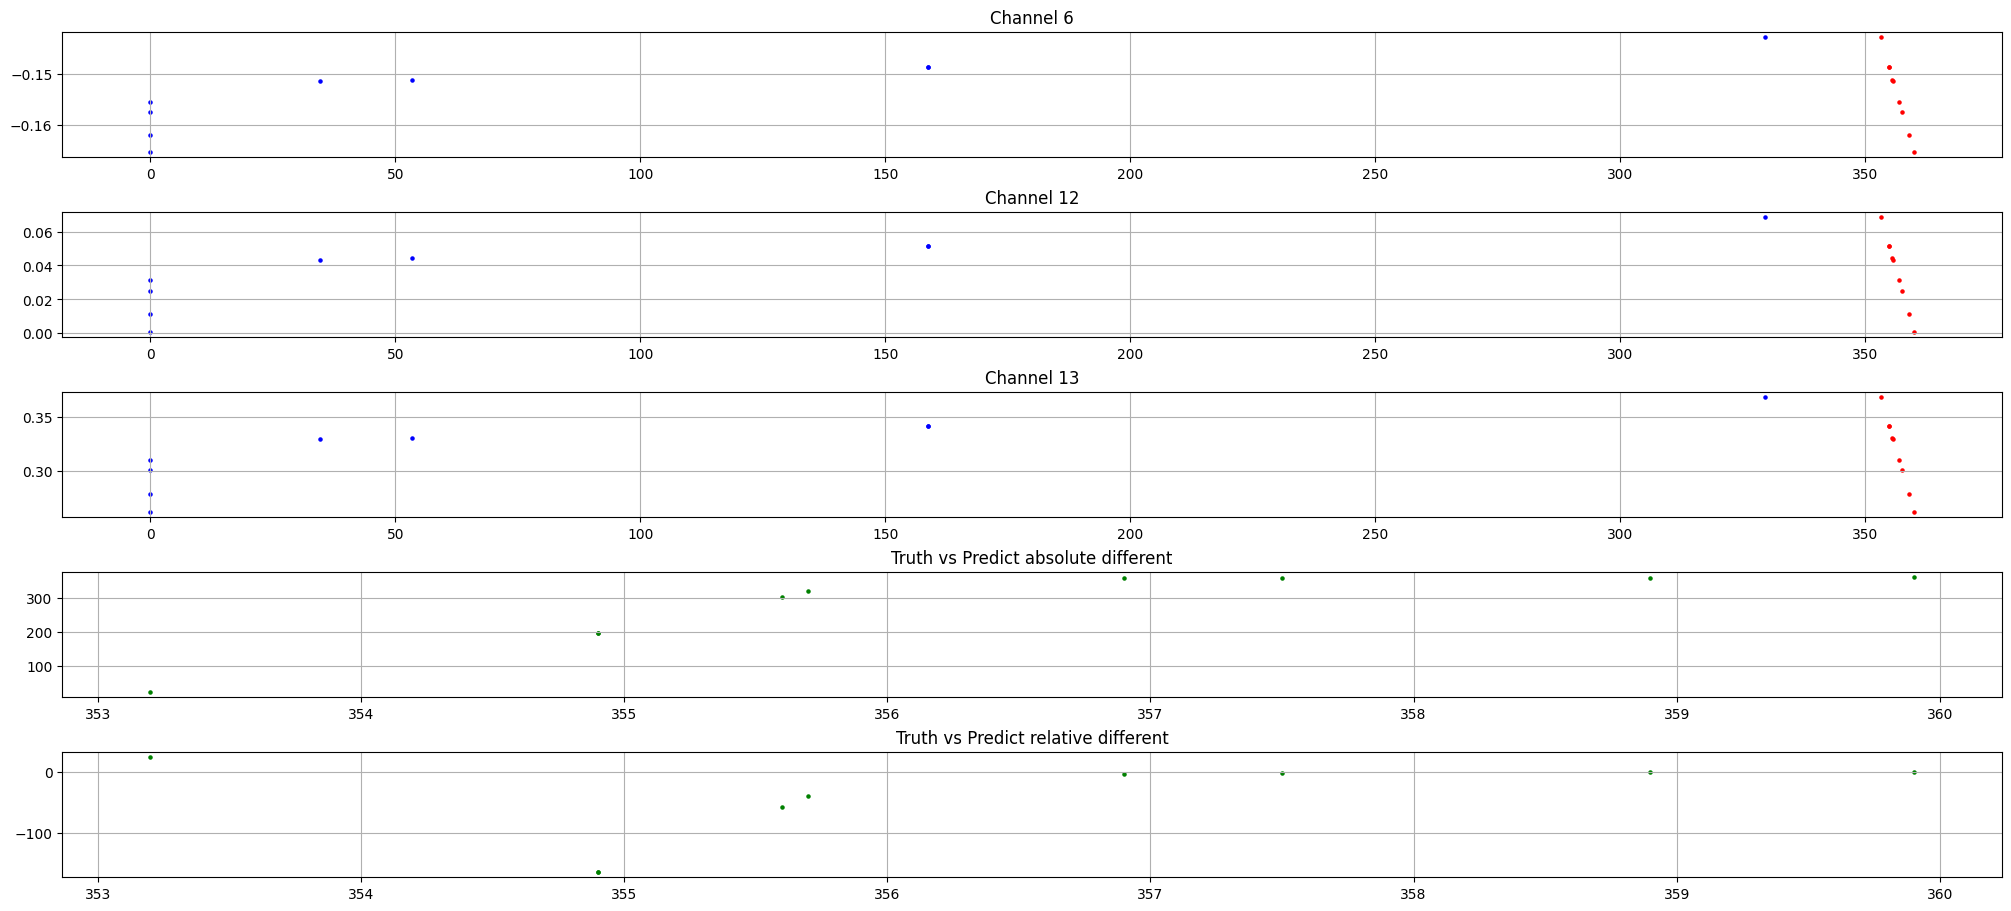

In [782]:
evaluates[0].plot_evaluation(350,360,True)